### Python Libraries and Modules for Data Analysis

This notebook utilizes a variety of Python libraries for data analysis and machine learning. Below is a summary of the imported libraries and their roles:

1. **Data Manipulation and Analysis**
   - `pandas as pd`: Provides data structures and data analysis tools.
   - `numpy as np`: Supports large, multi-dimensional arrays and matrices, along with a collection of mathematical functions.

2. **Statistical Analysis**
   - `scipy.stats`: Contains functions for statistical tests and distribution functions.
     - `ttest_ind`: Performs the independent two-sample t-test.
     - `ttest_rel`: Performs the paired sample t-test.
     - `wilcoxon`: Performs the Wilcoxon signed-rank test.
     - `spearmanr`: Computes Spearman rank-order correlation coefficient.
     - `pearsonr`: Computes Pearson correlation coefficient.
   - `statsmodels.api as sm`: Provides classes and functions for estimating and interpreting statistical models.
   - `statsmodels.formula.api as smf`: Allows for formula-based statistical models.
     - `ols`: Performs ordinary least squares regression.
   - `statsmodels.stats.multitest`: Contains functions for multiple testing correction.
     - `multipletests`: Corrects p-values for multiple comparisons.
   - `statsmodels.stats.multicomp`: Performs pairwise comparisons.
     - `pairwise_tukeyhsd`: Conducts Tukey's HSD test for multiple comparisons.

3. **Data Visualization**
   - `seaborn as sns`: Provides a high-level interface for drawing attractive and informative statistical graphics.
   - `matplotlib.pyplot as plt`: Creates static, animated, and interactive visualizations in Python.

4. **Machine Learning and Model Evaluation**
   - `sklearn.pipeline as Pipeline`: Constructs and evaluates machine learning pipelines.
   - `sklearn.preprocessing`: Scales features for machine learning models.
     - `MinMaxScaler`: Scales features to a given range.
     - `StandardScaler`: Standardizes features by removing the mean and scaling to unit variance.
   - `sklearn.linear_model`: Contains linear models for classification and regression.
     - `LogisticRegression`: Logistic regression classifier.
   - `sklearn.svm`: Provides support vector machines for classification and regression.
     - `SVC`: Support Vector Classification.
   - `sklearn.model_selection`: Splits data into training and test sets and performs cross-validation.
   - `LabelEncoder`:   class provided by scikit-learn's preprocessing module used for encoding categorical labels into numerical values.
     - `train_test_split`: Splits arrays or matrices into random train and test subsets.
     - `cross_val_score`: Evaluates a score by cross-validation.
   - `sklearn.metrics`: Evaluates the performance of machine learning models.
     - `classification_report`: Generates a classification report.
     - `roc_curve`: Computes Receiver Operating Characteristic (ROC) curve.
     - `auc`: Computes the Area Under the Curve (AUC) for ROC.

5. **SHAP Values**
   - `shap`: Provides SHAP (SHapley Additive exPlanations) values for model interpretability.
   - `! pip install shap`: Installs the SHAP library if not already available.

These libraries collectively enable comprehensive data analysis, statistical testing, visualization, and machine learning model evaluation.


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import ttest_rel, wilcoxon
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import spearmanr, pearsonr
! pip install shap
import shap
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV




## Upload all relevant datasets to google drive and mount in notebook to enable comprehensive analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###1. ANALYSIS OF CSER (TIME DOMAIN ENTROPY)

This section demonstrates how to import the CSV file containing CSER results from Google Drive into a pandas DataFrame named `CSER`. The CSV file is located at the specified path in Google Drive.
This section outlines the process of importing, analyzing, and visualizing entropy rate data. The analysis includes calculating descriptive statistics, visualizing the distribution, performing ANOVA, and conducting post hoc tests.



In [3]:
# Import the CSER results CSV file located in the specified Google Drive path into a pandas DataFrame named 'CSER'
CSER = pd.read_csv('/content/drive/MyDrive/CSER DATA/results.csv')
print(CSER)

     Drug  Subject  Channel Condition  EntropyRate
0     LSD        1        1   Placebo    -0.063056
1     LSD        1        2   Placebo    -0.148119
2     LSD        1        3   Placebo    -0.015921
3     LSD        1        4   Placebo    -0.041063
4     LSD        1        5   Placebo    -0.018486
...   ...      ...      ...       ...          ...
8635  PSI       14       86      Drug    -0.016322
8636  PSI       14       87      Drug    -0.006322
8637  PSI       14       88      Drug     0.001439
8638  PSI       14       89      Drug    -0.013515
8639  PSI       14       90      Drug    -0.025253

[8640 rows x 5 columns]


  Drug Condition      mean       std
0  KET      Drug -0.165782  0.133774
1  KET   Placebo -0.312086  0.215588
2  LSD      Drug -0.075123  0.081814
3  LSD   Placebo -0.237574  0.168363
4  PSI      Drug -0.070906  0.121877
5  PSI   Placebo -0.204972  0.226763


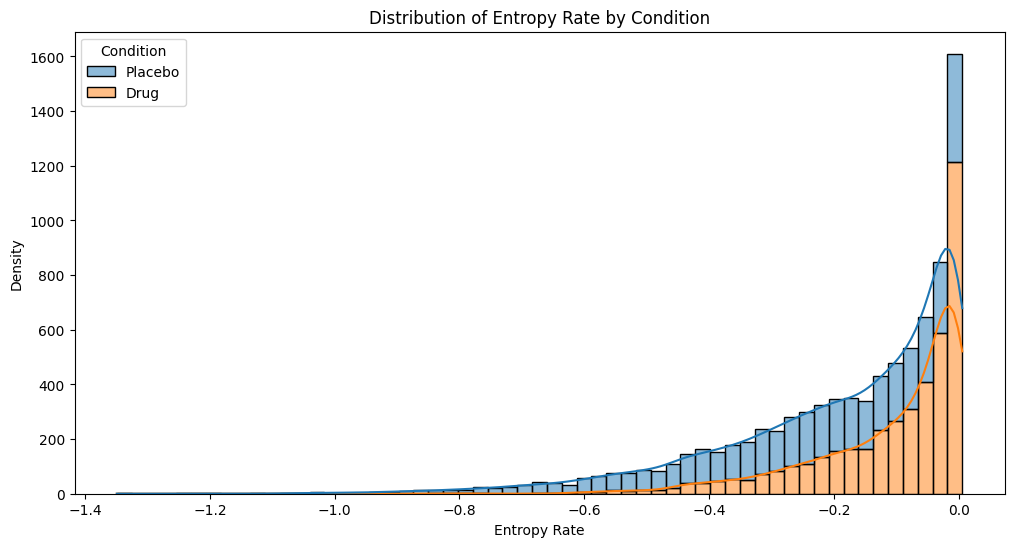

In [4]:
# Descriptive Statistics

# Calculate mean and standard deviation per Drug and Condition
summary_stats = CSER.groupby(['Drug', 'Condition'])['EntropyRate'].agg(['mean', 'std']).reset_index()
print(summary_stats)

# Visualization
# Plotting the distribution of EntropyRate by Drug and Condition
plt.figure(figsize=(12, 6))
sns.histplot(data=CSER, x='EntropyRate', hue='Condition', multiple='stack', kde=True)
plt.title('Distribution of Entropy Rate by Condition')
plt.xlabel('Entropy Rate')
plt.ylabel('Density')
plt.show()

   Subject Drug Condition  EntropyRate
0        1  KET      Drug    -0.266020
1        1  KET   Placebo    -0.577027
2        1  LSD      Drug    -0.058001
3        1  LSD   Placebo    -0.113942
4        1  PSI      Drug    -0.180592


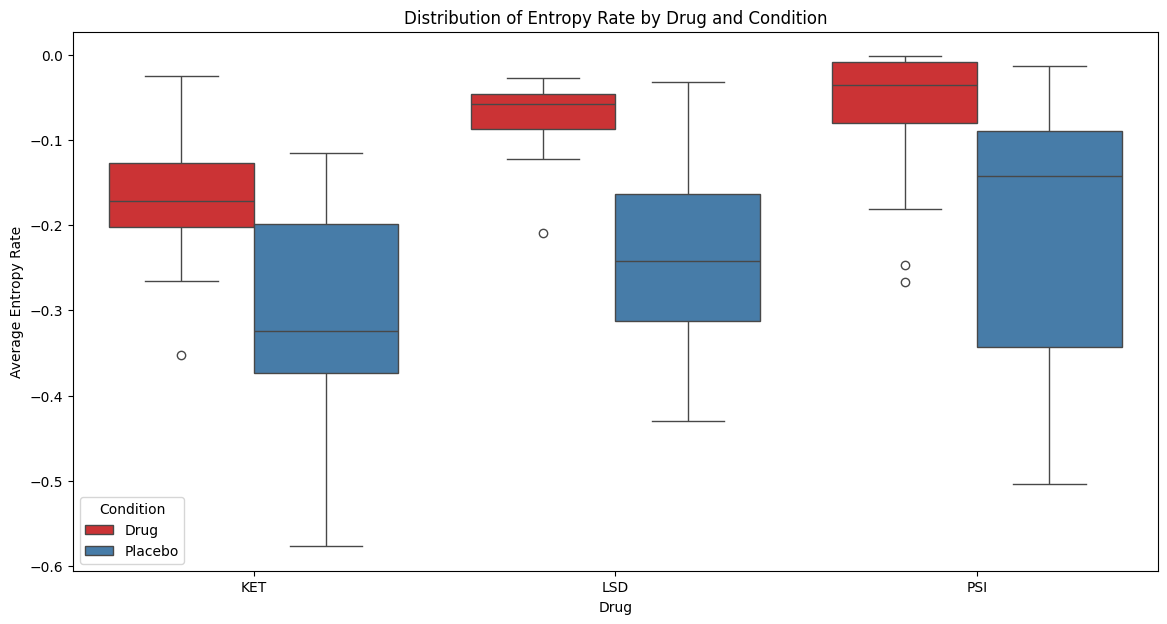

                        sum_sq    df          F        PR(>F)
C(Drug)               0.197008   2.0   8.437382  4.380568e-04
C(Condition)          0.524135   1.0  44.894982  1.756336e-09
C(Drug):C(Condition)  0.002952   2.0   0.126407  8.814123e-01
Residual              1.050722  90.0        NaN           NaN
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
   KET Drug KET Placebo  -0.1463  0.001 -0.2484 -0.0442   True
   KET Drug    LSD Drug   0.0907 0.1573  -0.018  0.1993  False
   KET Drug LSD Placebo  -0.0718 0.3947 -0.1805  0.0369  False
   KET Drug    PSI Drug   0.0949 0.1372 -0.0159  0.2057  False
   KET Drug PSI Placebo  -0.0392 0.9067   -0.15  0.0716  False
KET Placebo    LSD Drug    0.237    0.0  0.1283  0.3456   True
KET Placebo LSD Placebo   0.0745 0.3524 -0.0342  0.1832  False
KET Placebo    PSI Drug   0.2412    0.0  0.1304   0.352   Tr

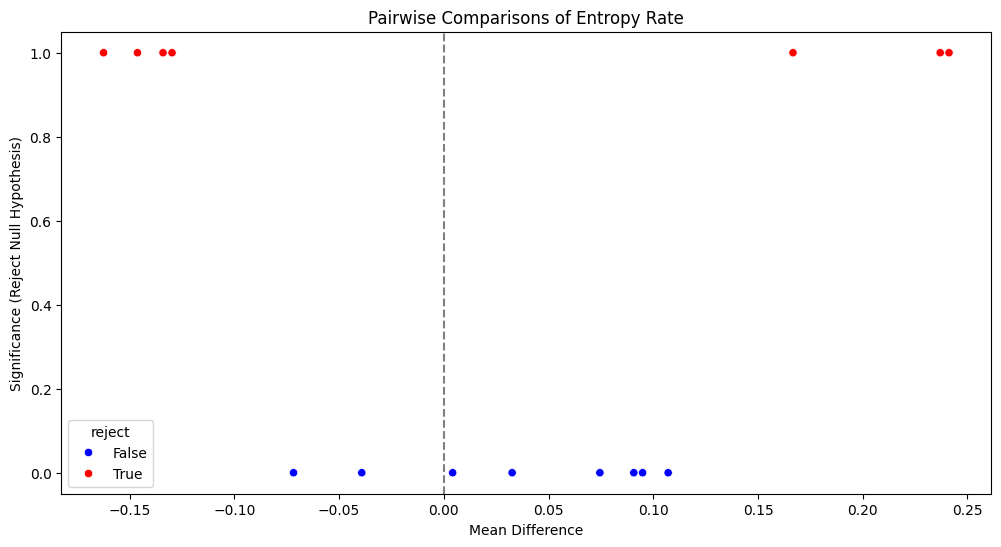

In [5]:
# Group the data by Participant, Drug, and Condition to calculate the mean EntropyRate for each participant
participant_avg_entropy = CSER.groupby(['Subject', 'Drug', 'Condition'])['EntropyRate'].mean().reset_index()

# Display the result
print(participant_avg_entropy.head())

# Visualization: Box Plot
plt.figure(figsize=(14, 7))
sns.boxplot(data=participant_avg_entropy, x='Drug', y='EntropyRate', hue='Condition', palette='Set1')
plt.title('Distribution of Entropy Rate by Drug and Condition')
plt.xlabel('Drug')
plt.ylabel('Average Entropy Rate')
plt.legend(title='Condition')
plt.show()

#Perform ANOVA and Post Hoc Analysis

# Perform ANOVA using the averaged participant data
model = ols('EntropyRate ~ C(Drug) * C(Condition)', data=participant_avg_entropy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)


# Create a dataframe with the relevant columns for pairwise comparison
tukey = pairwise_tukeyhsd(endog=participant_avg_entropy['EntropyRate'],
                          groups=participant_avg_entropy['Drug'] + ' ' + participant_avg_entropy['Condition'],
                          alpha=0.05)

# Print the results of Tukey's HSD
print(tukey)


# Convert Tukey's HSD results to a DataFrame for easier plotting
tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

# Plot pairwise comparisons
plt.figure(figsize=(12, 6))
sns.scatterplot(x='meandiff', y='reject', hue='reject', data=tukey_df, palette={True: 'red', False: 'blue'})
plt.axvline(0, linestyle='--', color='grey')
plt.xlabel('Mean Difference')
plt.ylabel('Significance (Reject Null Hypothesis)')
plt.title('Pairwise Comparisons of Entropy Rate')
plt.show()

### 1.1 REGIONAL ANALYSIS OF CSER
This section focuses on analyzing the CSER of different brain regions. The analysis includes defining regions of interest (ROIs), associating channels with these regions, calculating average entropy rates, and visualizing the results.

     Drug  Subject  Channel Condition  EntropyRate    ROI_Region
0     LSD        1        1   Placebo    -0.063056  sensorimotor
1     LSD        1        2   Placebo    -0.148119  sensorimotor
2     LSD        1        3   Placebo    -0.015921       frontal
3     LSD        1        4   Placebo    -0.041063       frontal
4     LSD        1        5   Placebo    -0.018486       frontal
...   ...      ...      ...       ...          ...           ...
8635  PSI       14       86      Drug    -0.016322      temporal
8636  PSI       14       87      Drug    -0.006322      temporal
8637  PSI       14       88      Drug     0.001439      temporal
8638  PSI       14       89      Drug    -0.013515      temporal
8639  PSI       14       90      Drug    -0.025253      temporal

[8640 rows x 6 columns]
      ROI_Region Condition      mean       std
0      cingulate      Drug -0.156392  0.078952
1      cingulate   Placebo -0.312887  0.121388
2        frontal      Drug -0.056850  0.031601
3      

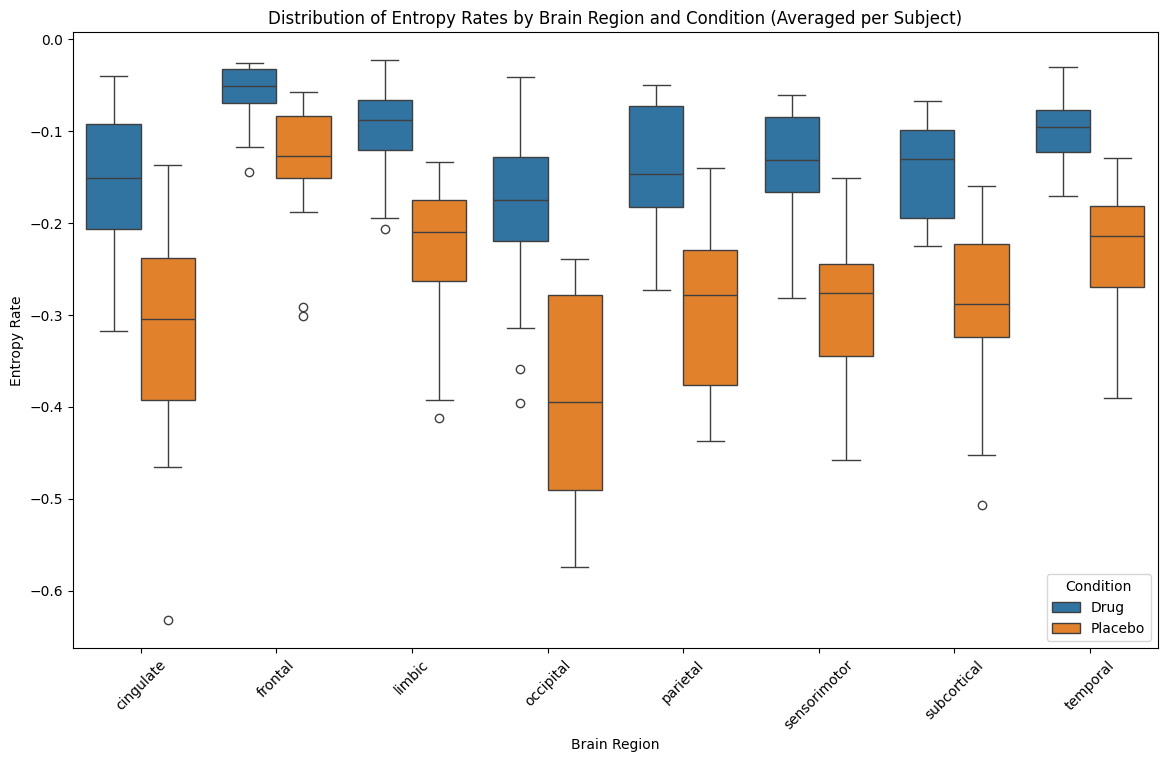

              sensorimotor   frontal  temporal  cingulate    limbic  \
sensorimotor           NaN  0.119946  0.049452   0.016566  0.049170   
frontal           0.119946       NaN  0.070494   0.136511  0.070776   
temporal          0.049452  0.070494       NaN   0.066017  0.000281   
cingulate         0.016566  0.136511  0.066017        NaN  0.065736   
limbic            0.049170  0.070776  0.000281   0.065736       NaN   
occipital         0.069984  0.189929  0.119435   0.053418  0.119154   
parietal          0.000304  0.120250  0.049756   0.016261  0.049474   
subcortical       0.003976  0.123922  0.053428   0.012589  0.053147   

              occipital  parietal  subcortical  
sensorimotor   0.069984  0.000304     0.003976  
frontal        0.189929  0.120250     0.123922  
temporal       0.119435  0.049756     0.053428  
cingulate      0.053418  0.016261     0.012589  
limbic         0.119154  0.049474     0.053147  
occipital           NaN  0.069679     0.066007  
parietal       0.

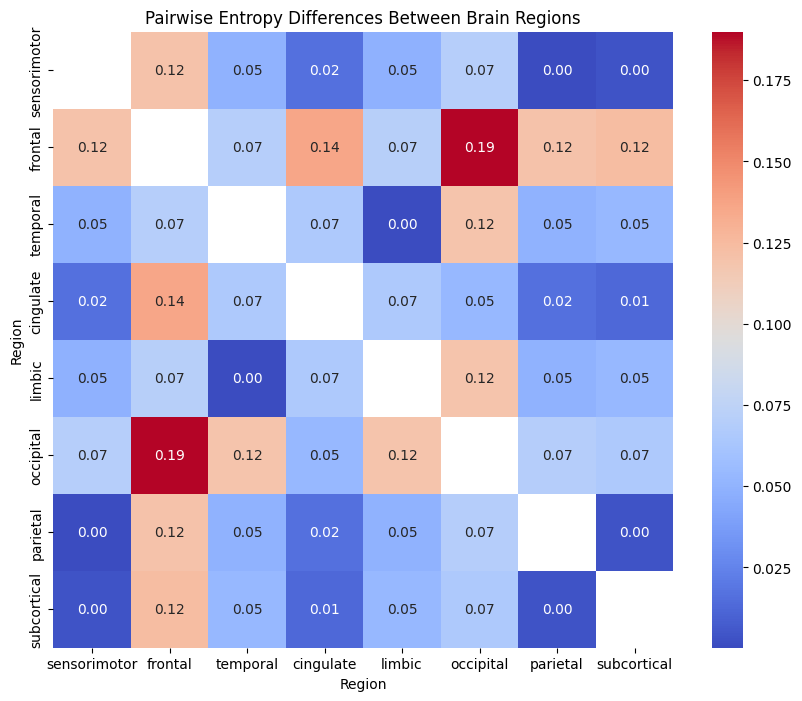

In [6]:
# Define ROIs and their corresponding regions
roi_regions = {
    'sensorimotor': [1, 2, 17, 18, 57, 58],
    'frontal': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    'temporal': [29, 30, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
    'cingulate': [31, 32, 33, 34, 35, 36],
    'limbic': [37, 38, 39, 40, 41, 42],
    'occipital': [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56],
    'parietal': [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
    'subcortical': [71, 72, 73, 74, 75, 76, 77, 78]
}

# Reverse the mapping to associate channels with regions
channel_to_roi = {}
for roi, channels in roi_regions.items():
    for channel in channels:
        channel_to_roi[channel] = roi

# Create a new column for ROI
CSER['ROI_Region'] = CSER['Channel'].map(channel_to_roi)

# Display the updated DataFrame
print(CSER)



# Calculate the average entropy rate per subject, region, and condition
regional_subject_avg = CSER.groupby(['Subject', 'ROI_Region', 'Condition'])['EntropyRate'].mean().reset_index()

# Calculate the mean and standard deviation of these regional averages
regional_summary_stats_subject = regional_subject_avg.groupby(['ROI_Region', 'Condition'])['EntropyRate'].agg(['mean', 'std']).reset_index()

print(regional_summary_stats_subject)

#Box plot visualization
plt.figure(figsize=(14, 8))
sns.boxplot(data=regional_subject_avg, x='ROI_Region', y='EntropyRate', hue='Condition')
plt.title('Distribution of Entropy Rates by Brain Region and Condition (Averaged per Subject)')
plt.xlabel('Brain Region')
plt.ylabel('Entropy Rate')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.show()


# Create a matrix to hold pairwise entropy comparisons
regions = CSER['ROI_Region'].unique()
pairwise_entropy = pd.DataFrame(index=regions, columns=regions, dtype=float)

for region1 in regions:
    for region2 in regions:
        if region1 != region2:
            # Compare mean entropy rates between two regions
            mean_entropy_region1 = CSER[CSER['ROI_Region'] == region1]['EntropyRate'].mean()
            mean_entropy_region2 = CSER[CSER['ROI_Region'] == region2]['EntropyRate'].mean()
            pairwise_entropy.loc[region1, region2] = np.abs(mean_entropy_region1 - mean_entropy_region2)

# Display the pairwise differences table
print(pairwise_entropy)

# Plot the pairwise entropy differences
plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_entropy, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pairwise Entropy Differences Between Brain Regions')
plt.xlabel('Region')
plt.ylabel('Region')
plt.show()


### 1.2 TEMPORAL ANALYSIS OF CSER
This section focuses on analyzing the entropy rates over time. Temporal analysis involves examining how the entropy rate evolves during different periods of the experiment. The temporal changes in entropy rates are calculated and visualized to understand any patterns or trends.


Missing values in 'EntropyRate':
0
       EntropyRate      Epoch
count    18.000000  18.000000
mean     -0.186642   3.111111
std       0.109866   1.967049
min      -0.360623   0.000000
25%      -0.259978   2.000000
50%      -0.182130   3.000000
75%      -0.079317   5.000000
max      -0.027880   6.000000
EntropyRate    0
Drug           0
Condition      0
Epoch          0
dtype: int64
Error in ANOVA analysis: array must not contain infs or NaNs


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale



Tukey's HSD Test Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
   KET Drug KET Placebo   -0.141 0.1822 -0.3263 0.0442  False
   KET Drug    LSD Drug   0.0757 0.7944 -0.1244 0.2758  False
   KET Drug LSD Placebo  -0.1206 0.3835 -0.3207 0.0795  False
   KET Drug    PSI Drug   0.0717 0.8873 -0.1552 0.2986  False
   KET Drug PSI Placebo  -0.0561 0.9558  -0.283 0.1707  False
KET Placebo    LSD Drug   0.2167 0.0312  0.0167 0.4168   True
KET Placebo LSD Placebo   0.0204 0.9992 -0.1797 0.2205  False
KET Placebo    PSI Drug   0.2127 0.0709 -0.0142 0.4396  False
KET Placebo PSI Placebo   0.0849 0.8016  -0.142 0.3118  False
   LSD Drug LSD Placebo  -0.1963  0.079 -0.4102 0.0176  False
   LSD Drug    PSI Drug   -0.004    1.0 -0.2432 0.2351  False
   LSD Drug PSI Placebo  -0.1319 0.4718  -0.371 0.1073  False
LSD Placebo    PSI Drug   0.1923  0.146 -0.

<ipython-input-7-c4036b5dc7d7>:79: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=subject_avg_entropy, x='Epoch', y='EntropyRate', hue='Drug', style='Condition', ci=None)


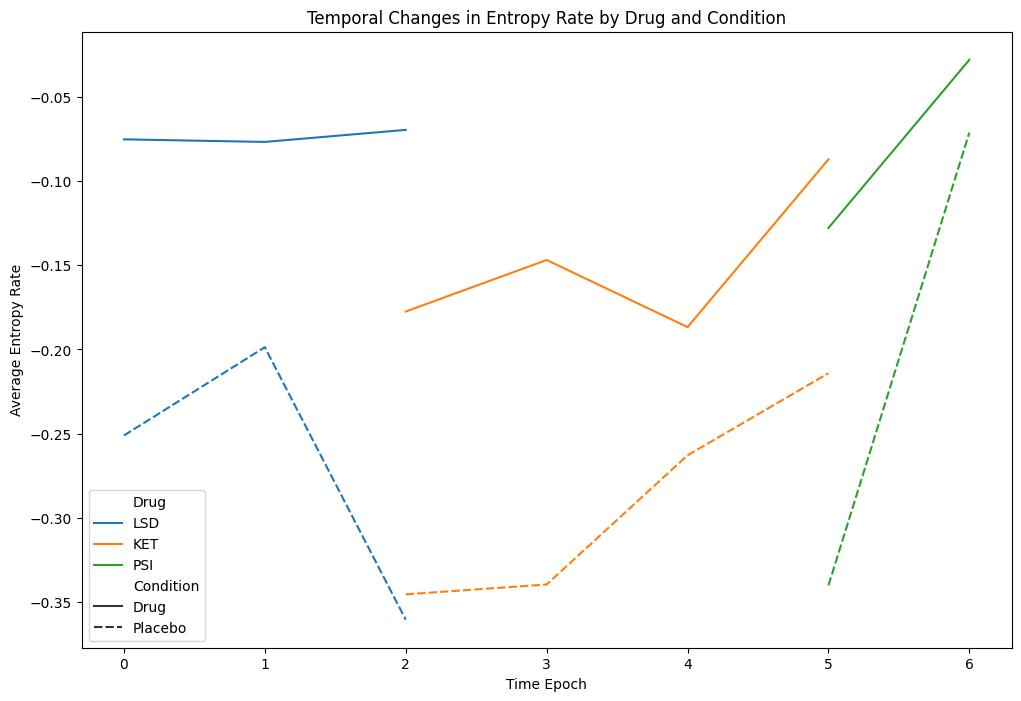


Drug: LSD, Condition: Drug
                            OLS Regression Results                            
Dep. Variable:            EntropyRate   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     1.257
Date:                Wed, 14 Aug 2024   Prob (F-statistic):              0.464
Time:                        17:35:37   Log-Likelihood:                 14.316
No. Observations:                   3   AIC:                            -24.63
Df Residuals:                       1   BIC:                            -26.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0766   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


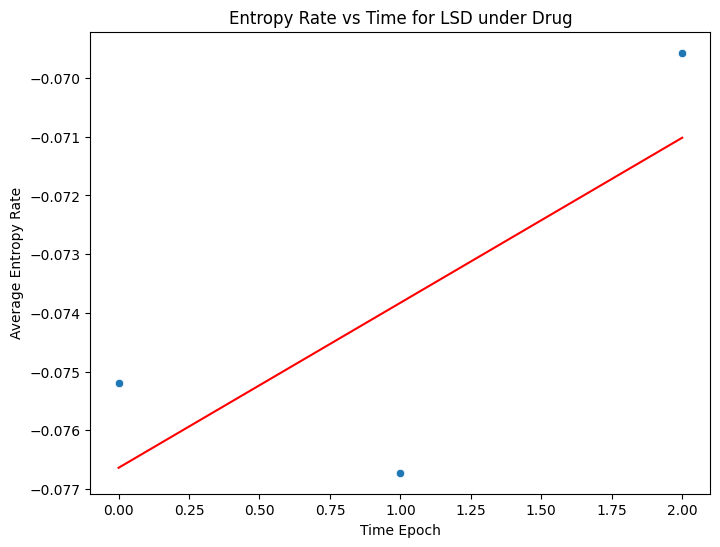


Drug: LSD, Condition: Placebo
                            OLS Regression Results                            
Dep. Variable:            EntropyRate   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                 -0.122
Method:                 Least Squares   F-statistic:                    0.7822
Date:                Wed, 14 Aug 2024   Prob (F-statistic):              0.539
Time:                        17:35:38   Log-Likelihood:                 4.6988
No. Observations:                   3   AIC:                            -5.398
Df Residuals:                       1   BIC:                            -7.200
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2154

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


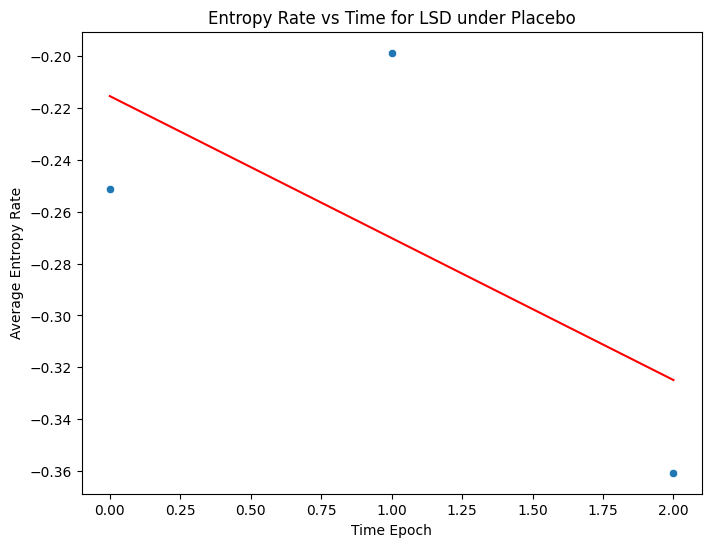


Drug: KET, Condition: Drug
                            OLS Regression Results                            
Dep. Variable:            EntropyRate   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     1.576
Date:                Wed, 14 Aug 2024   Prob (F-statistic):              0.336
Time:                        17:35:40   Log-Likelihood:                 8.4666
No. Observations:                   4   AIC:                            -12.93
Df Residuals:                       2   BIC:                            -14.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2305   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


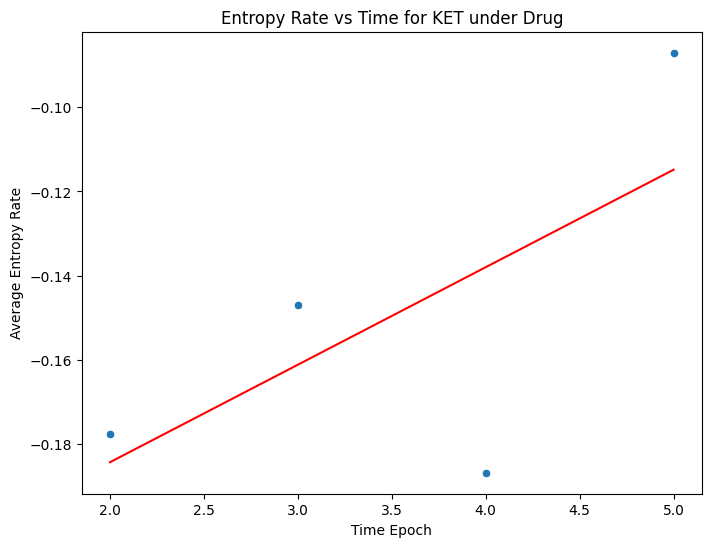


Drug: KET, Condition: Placebo
                            OLS Regression Results                            
Dep. Variable:            EntropyRate   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     23.38
Date:                Wed, 14 Aug 2024   Prob (F-statistic):             0.0402
Time:                        17:35:41   Log-Likelihood:                 11.018
No. Observations:                   4   AIC:                            -18.04
Df Residuals:                       2   BIC:                            -19.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4554

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


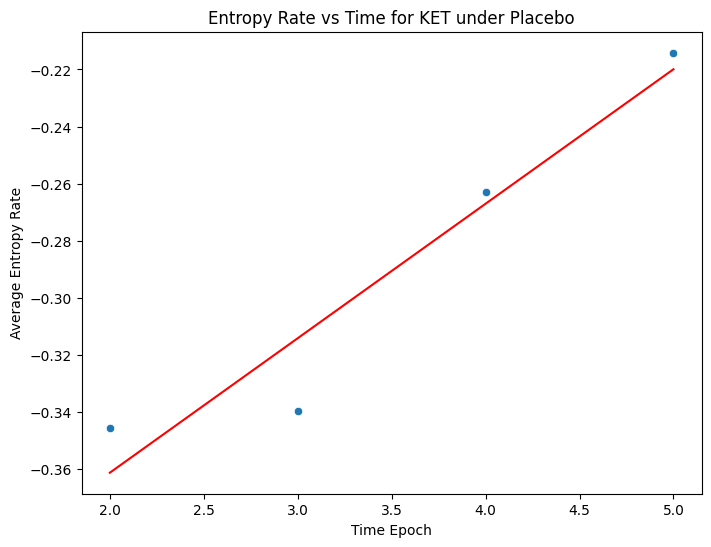


Drug: PSI, Condition: Drug
                            OLS Regression Results                            
Dep. Variable:            EntropyRate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 14 Aug 2024   Prob (F-statistic):                nan
Time:                        17:35:42   Log-Likelihood:                 71.106
No. Observations:                   2   AIC:                            -138.2
Df Residuals:                       0   BIC:                            -140.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6276   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


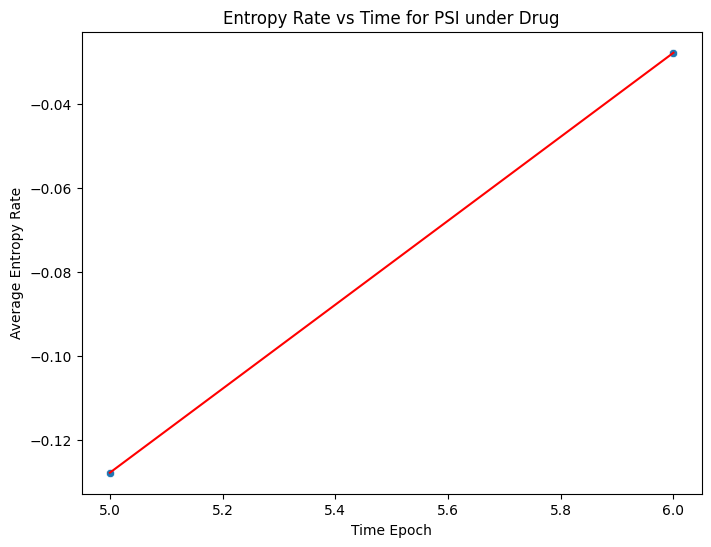


Drug: PSI, Condition: Placebo
                            OLS Regression Results                            
Dep. Variable:            EntropyRate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 14 Aug 2024   Prob (F-statistic):                nan
Time:                        17:35:42   Log-Likelihood:                 68.080
No. Observations:                   2   AIC:                            -132.2
Df Residuals:                       0   BIC:                            -134.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6857

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


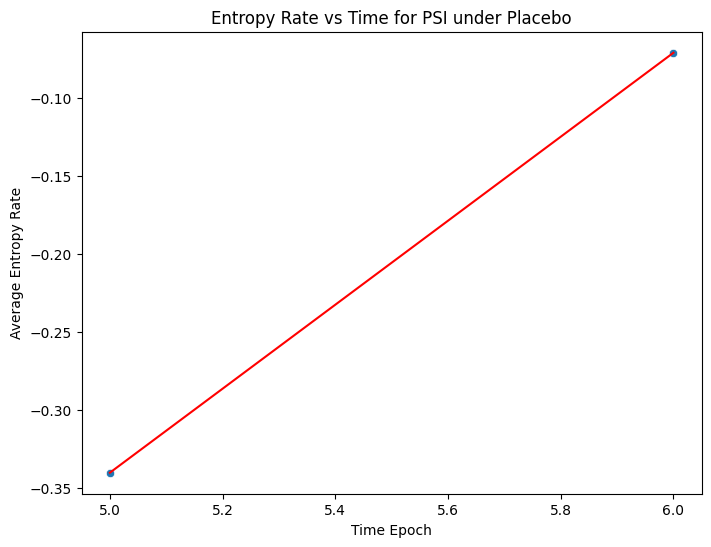

In [7]:
# Step 1: Data Preparation
# Define the number of observations per epoch
epoch_size = 1200

# Calculate the number of epochs
num_epochs = len(CSER) // epoch_size

# Generate time points for each epoch
time_points = np.linspace(0, 2, epoch_size)

# Trim the dataset to ensure it's an exact multiple of epoch size
temporal_entropy_perchan = CSER.iloc[:num_epochs * epoch_size].copy()

# Assign time points and epoch indices
temporal_entropy_perchan['Time'] = np.tile(time_points, num_epochs)
temporal_entropy_perchan['Epoch'] = np.repeat(np.arange(num_epochs), epoch_size)
temporal_entropy_perchan['Subject'] = np.repeat(np.arange(len(CSER) // epoch_size), epoch_size)

# Ensure 'EntropyRate' is numeric
temporal_entropy_perchan['EntropyRate'] = pd.to_numeric(temporal_entropy_perchan['EntropyRate'], errors='coerce')

# Calculate average entropy by subject, drug, condition, and epoch
subject_avg_entropy = temporal_entropy_perchan.groupby(['Subject', 'Drug', 'Condition', 'Epoch'])['EntropyRate'].mean().reset_index()

# Check for missing values or infinite values in 'EntropyRate'
print("Missing values in 'EntropyRate':")
print(subject_avg_entropy['EntropyRate'].isna().sum())

# Remove rows with missing or infinite values
subject_avg_entropy = subject_avg_entropy.dropna(subset=['EntropyRate'])


# Step 2: Statistical Analysis

# Check for NaNs or infinite values
print(subject_avg_entropy[['EntropyRate', 'Drug', 'Condition', 'Epoch']].describe())
print(subject_avg_entropy[['EntropyRate', 'Drug', 'Condition', 'Epoch']].isna().sum())

# Ensure 'EntropyRate' is numeric
subject_avg_entropy['EntropyRate'] = pd.to_numeric(subject_avg_entropy['EntropyRate'], errors='coerce')

# Drop rows where 'EntropyRate' is NaN
subject_avg_entropy = subject_avg_entropy.dropna(subset=['EntropyRate'])

# Perform ANOVA
try:
    model = ols('EntropyRate ~ C(Drug) * C(Condition) * C(Epoch)', data=subject_avg_entropy).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\nANOVA Table:")
    print(anova_table)
except Exception as e:
    print(f"Error in ANOVA analysis: {e}")


# Perform post-hoc analysis
# Create a combined group variable for Tukey's HSD test
subject_avg_entropy['Group'] = subject_avg_entropy['Drug'] + ' ' + subject_avg_entropy['Condition']
tukey = pairwise_tukeyhsd(endog=subject_avg_entropy['EntropyRate'],
                          groups=subject_avg_entropy['Group'],
                          alpha=0.05)
print("\nTukey's HSD Test Results:")
print(tukey)

# Convert Tukey's HSD results to DataFrame for better readability
tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

# Apply Bonferroni correction
p_values = tukey_df['p-adj'].tolist()
bonferroni_corrected = multipletests(p_values, method='bonferroni')

# Add corrected p-values to DataFrame
tukey_df['Bonferroni Corrected p-value'] = bonferroni_corrected[1]
print("\nBonferroni Corrected p-values:")
print(tukey_df)

# Step 3: Temporal Trends Analysis
# Plot average entropy over time for each drug and condition
plt.figure(figsize=(12, 8))
sns.lineplot(data=subject_avg_entropy, x='Epoch', y='EntropyRate', hue='Drug', style='Condition', ci=None)
plt.xlabel('Time Epoch')
plt.ylabel('Average Entropy Rate')
plt.title('Temporal Changes in Entropy Rate by Drug and Condition')
plt.show()

# Fit a linear model to explore temporal trends
for drug in subject_avg_entropy['Drug'].unique():
    for condition in subject_avg_entropy['Condition'].unique():
        subset = subject_avg_entropy[(subject_avg_entropy['Drug'] == drug) & (subject_avg_entropy['Condition'] == condition)]
        model = ols('EntropyRate ~ Epoch', data=subset).fit()
        print(f"\nDrug: {drug}, Condition: {condition}")
        print(model.summary())

        # Plot results
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='Epoch', y='EntropyRate', data=subset)
        sns.lineplot(x='Epoch', y=model.fittedvalues, data=subset, color='red')
        plt.xlabel('Time Epoch')
        plt.ylabel('Average Entropy Rate')
        plt.title(f'Entropy Rate vs Time for {drug} under {condition}')
        plt.show()


### 2. SPECTRAL ENTROPY ANALYSIS

This section focuses on analyzing the spectral entropy data across different frequency bands, conditions, and drugs. The goal is to understand how entropy rates vary by frequency band and drug, and to identify any significant differences or patterns.

In [8]:
# Import  and display the spectral CSER results CSV file located in the specified Google Drive path into a pandas DataFrame named 'spectral_entropy_perchan'
spectral_entropy_perchan = pd.read_csv('/content/drive/MyDrive/MEG DATA/spectral_entropy_results_perchan.csv')
print (spectral_entropy_perchan.head())

  Drug  Subject Condition  Channel      ROI FrequencyBand  EntropyRate
0  LSD        1   Placebo        1  channel        Band_1     0.030264
1  LSD        1   Placebo        1  channel        Band_2     0.024354
2  LSD        1   Placebo        1  channel        Band_3     0.019130
3  LSD        1   Placebo        1  channel        Band_4    -0.001438
4  LSD        1   Placebo        1  channel        Band_5    -0.108619


In [9]:
#Preprocessing
spectral_entropy_perchan = spectral_entropy_perchan.drop(columns = ['ROI'])

# Create a mapping dictionary
band_mapping = {
    'Band_1': 'Delta',
    'Band_2': 'Theta',
    'Band_3': 'Alpha',
    'Band_4': 'Beta',
    'Band_5': 'Gamma'
}

# Replace the frequency band numbers with names
spectral_entropy_perchan['FrequencyBand'] = spectral_entropy_perchan['FrequencyBand'].map(band_mapping)

# Display the updated DataFrame
print(spectral_entropy_perchan)

      Drug  Subject Condition  Channel FrequencyBand  EntropyRate
0      LSD        1   Placebo        1         Delta     0.030264
1      LSD        1   Placebo        1         Theta     0.024354
2      LSD        1   Placebo        1         Alpha     0.019130
3      LSD        1   Placebo        1          Beta    -0.001438
4      LSD        1   Placebo        1         Gamma    -0.108619
...    ...      ...       ...      ...           ...          ...
43195  PSI       14      Drug       90         Delta     0.025392
43196  PSI       14      Drug       90         Theta     0.013516
43197  PSI       14      Drug       90         Alpha     0.006223
43198  PSI       14      Drug       90          Beta    -0.004992
43199  PSI       14      Drug       90         Gamma    -0.056161

[43200 rows x 6 columns]


Summary Statistics:
   Drug Condition FrequencyBand      mean       std
0   KET      Drug         Alpha  0.031649  0.011030
1   KET      Drug          Beta -0.001515  0.008806
2   KET      Drug         Delta  0.041586  0.011155
3   KET      Drug         Gamma -0.241057  0.095297
4   KET      Drug         Theta  0.034097  0.009185
5   KET   Placebo         Alpha  0.044329  0.009318
6   KET   Placebo          Beta -0.010160  0.012427
7   KET   Placebo         Delta  0.053391  0.008990
8   KET   Placebo         Gamma -0.395722  0.128605
9   KET   Placebo         Theta  0.045903  0.007492
10  LSD      Drug         Alpha  0.022237  0.008384
11  LSD      Drug          Beta  0.000612  0.006207
12  LSD      Drug         Delta  0.024911  0.010104
13  LSD      Drug         Gamma -0.120359  0.065478
14  LSD      Drug         Theta  0.021057  0.008169
15  LSD   Placebo         Alpha  0.038162  0.013653
16  LSD   Placebo          Beta -0.006945  0.010269
17  LSD   Placebo         Delta  0.046338  0

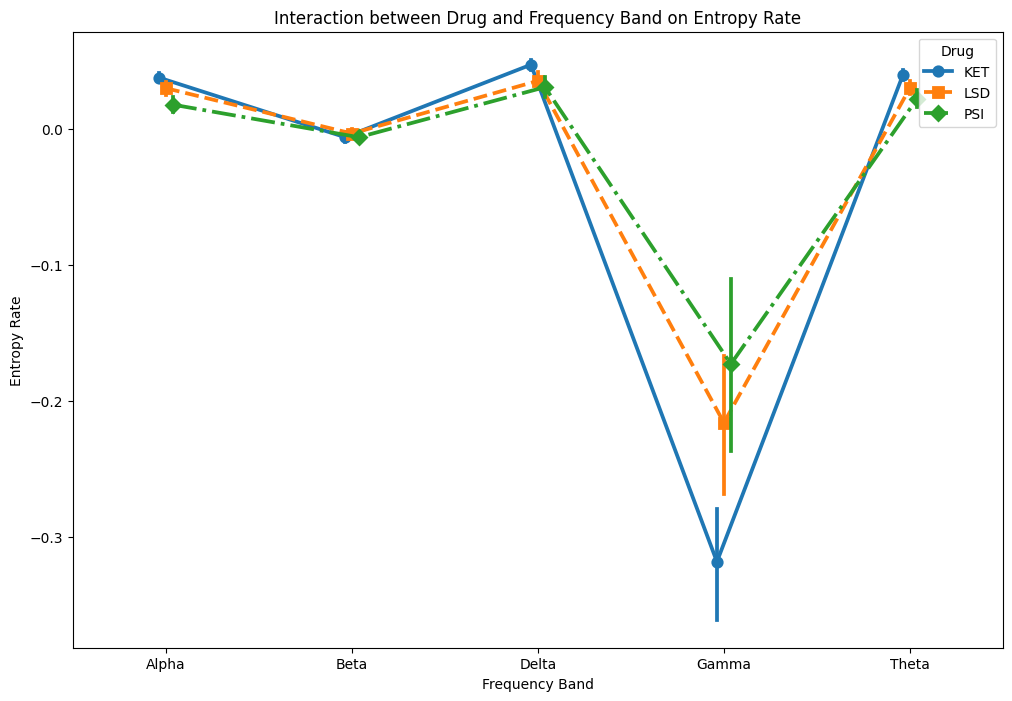

Condition          Drug   Placebo
FrequencyBand                    
Alpha          0.022750  0.036750
Beta          -0.001315 -0.008718
Delta          0.030545  0.047370
Gamma         -0.161365 -0.326545
Theta          0.024162  0.039466


<Figure size 1200x800 with 0 Axes>

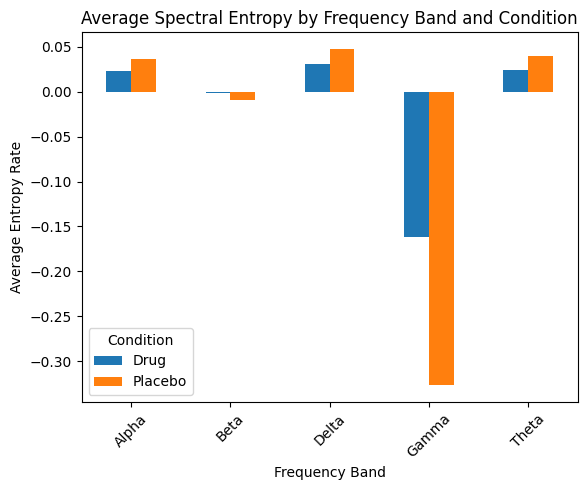


ANOVA Table:
                                         sum_sq     df           F  \
C(Drug)                                0.032529    2.0    5.132384   
C(Condition)                           0.076755    1.0   24.220617   
C(FrequencyBand)                       5.620466    4.0  443.397535   
C(Drug):C(Condition)                   0.000884    2.0    0.139440   
C(Drug):C(FrequencyBand)               0.359652    8.0   14.186436   
C(Condition):C(FrequencyBand)          0.596504    4.0   47.058130   
C(Drug):C(Condition):C(FrequencyBand)  0.007383    8.0    0.291206   
Residual                               1.426040  450.0         NaN   

                                              PR(>F)  
C(Drug)                                 6.252818e-03  
C(Condition)                            1.207519e-06  
C(FrequencyBand)                       1.386416e-154  
C(Drug):C(Condition)                    8.698825e-01  
C(Drug):C(FrequencyBand)                1.771552e-18  
C(Condition):C(FrequencyB

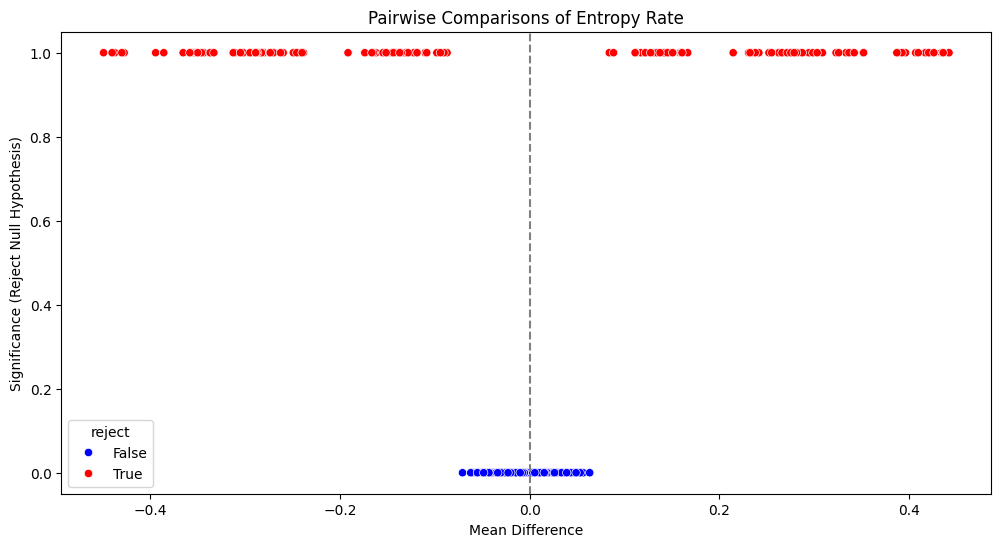

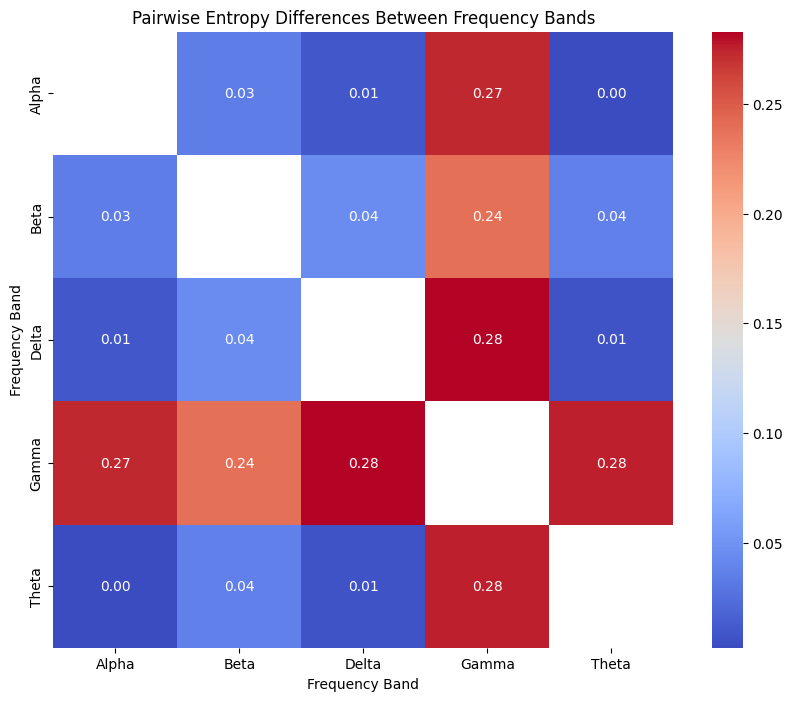

In [10]:
# Step 1: Data Preparation
# Compute mean entropy for each subject, drug, condition, and frequency band
subject_avg_entropy = spectral_entropy_perchan.groupby(['Subject', 'Drug', 'Condition', 'FrequencyBand'])['EntropyRate'].mean().reset_index()


# Step 2: Descriptive Statistics
# Compute summary statistics
summary_stats = subject_avg_entropy.groupby(['Drug', 'Condition', 'FrequencyBand'])['EntropyRate'].agg(['mean', 'std']).reset_index()
print("Summary Statistics:")
print(summary_stats)

#Visualizing interaction betweenn drug type and freq band
plt.figure(figsize=(12, 8))
sns.pointplot(x='FrequencyBand', y='EntropyRate', hue='Drug', data=subject_avg_entropy, dodge=True, markers=['o', 's', 'D'], linestyles=['-', '--', '-.'])
plt.title('Interaction between Drug and Frequency Band on Entropy Rate')
plt.xlabel('Frequency Band')
plt.ylabel('Entropy Rate')
plt.show()

# Visualization of average entropy by frequency band and condition
frequency_band_avg = subject_avg_entropy.groupby(['FrequencyBand', 'Condition'])['EntropyRate'].mean().reset_index()
frequency_band_pivot = frequency_band_avg.pivot(index='FrequencyBand', columns='Condition', values='EntropyRate')

print(frequency_band_pivot)

plt.figure(figsize=(12, 8))
frequency_band_pivot.plot(kind='bar')
plt.xlabel('Frequency Band')
plt.ylabel('Average Entropy Rate')
plt.title('Average Spectral Entropy by Frequency Band and Condition')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.show()


# Step 3: Statistical Analysis
# Perform ANOVA
model = ols('EntropyRate ~ C(Drug) * C(Condition) * C(FrequencyBand)', data=subject_avg_entropy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:")
print(anova_table)



# Conduct Tukey's HSD test
subject_avg_entropy['Group'] = subject_avg_entropy['Drug'] + ' ' + subject_avg_entropy['Condition'] + ' ' + subject_avg_entropy['FrequencyBand']
tukey = pairwise_tukeyhsd(endog=subject_avg_entropy['EntropyRate'],
                          groups=subject_avg_entropy['Group'],
                          alpha=0.05)
print("\nTukey's HSD Test Results:")
print(tukey)

# Convert Tukey's HSD results to a DataFrame for plotting
tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

# Apply Bonferroni correction
p_values = tukey_df['p-adj'].tolist()
bonferroni_corrected = multipletests(p_values, method='bonferroni')

# Add corrected p-values to the DataFrame
tukey_df['Bonferroni Corrected p-value'] = bonferroni_corrected[1]
print("\nBonferroni Corrected p-values:")
print(tukey_df)

# Visualization of Tukey's HSD test results
plt.figure(figsize=(12, 6))
sns.scatterplot(x='meandiff', y='reject', hue='reject', data=tukey_df, palette={True: 'red', False: 'blue'})
plt.axvline(0, linestyle='--', color='grey')
plt.xlabel('Mean Difference')
plt.ylabel('Significance (Reject Null Hypothesis)')
plt.title('Pairwise Comparisons of Entropy Rate')
plt.show()

# Step 4: Frequency Band Pairwise Comparisons
# Pairwise comparisons of frequency bands
bands = frequency_band_avg['FrequencyBand'].unique()
pairwise_entropy = pd.DataFrame(index=bands, columns=bands, dtype=float)

for band1 in bands:
    for band2 in bands:
        if band1 != band2:
            mean_entropy_band1 = frequency_band_avg[frequency_band_avg['FrequencyBand'] == band1]['EntropyRate'].mean()
            mean_entropy_band2 = frequency_band_avg[frequency_band_avg['FrequencyBand'] == band2]['EntropyRate'].mean()
            pairwise_entropy.loc[band1, band2] = np.abs(mean_entropy_band1 - mean_entropy_band2)

# Plot the pairwise entropy differences
plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_entropy, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pairwise Entropy Differences Between Frequency Bands')
plt.xlabel('Frequency Band')
plt.ylabel('Frequency Band')
plt.show()


### 3.Analysis of Lempel-Ziv Complexity (LZ)

This section outlines the analysis of Lempel-Ziv complexity (LZ) results. The analysis includes data import, preprocessing, descriptive statistics, and statistical testing.

In [11]:
# Import and display the LZ results CSV file located in the specified Google Drive path into a pandas DataFrame named 'lempel_ziv_complexity'
lempel_ziv_complexity = pd.read_csv('/content/drive/MyDrive/MEG DATA/lz_complexities.csv')
print(lempel_ziv_complexity.head())

  Psychedelic Condition  Subject  Channel           ROI  LZ Complexity
0         LSD       DRU       15       57  sensorimotor       0.808898
1         LSD       DRU       15       18  sensorimotor       0.844442
2         LSD       DRU       15       17  sensorimotor       0.732276
3         LSD       DRU       15        8       frontal       0.800001
4         LSD       DRU       15       27       frontal       0.850797


  Drug Condition  Subject  Channel           ROI        LZ
0  LSD       DRU       15       57  sensorimotor  0.808898
1  LSD       DRU       15       18  sensorimotor  0.844442
2  LSD       DRU       15       17  sensorimotor  0.732276
3  LSD       DRU       15        8       frontal  0.800001
4  LSD       DRU       15       27       frontal  0.850797
  Drug Condition      mean       std
0  KET       DRU  0.825008  0.053728
1  KET       PLA  0.835175  0.052773
2  LSD       DRU  0.830413  0.053242
3  LSD       PLA  0.829077  0.052290
4  PSI       DRU  0.834655  0.050281
5  PSI       PLA  0.840313  0.047275


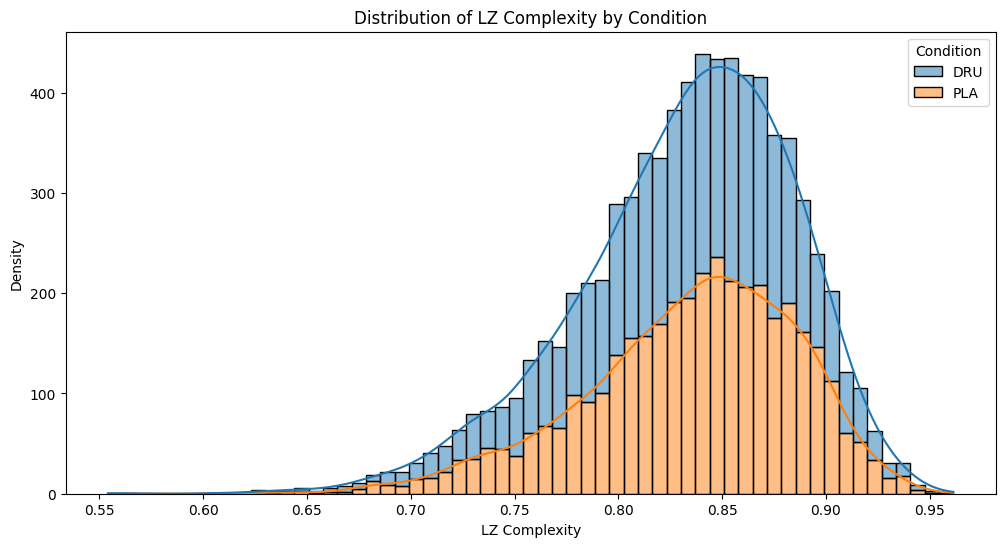

   Subject Drug Condition        LZ
0        1  KET       DRU  0.826530
1        1  KET       PLA  0.843773
2        1  LSD       DRU  0.846276
3        1  LSD       PLA  0.801277
4        1  PSI       DRU  0.842593


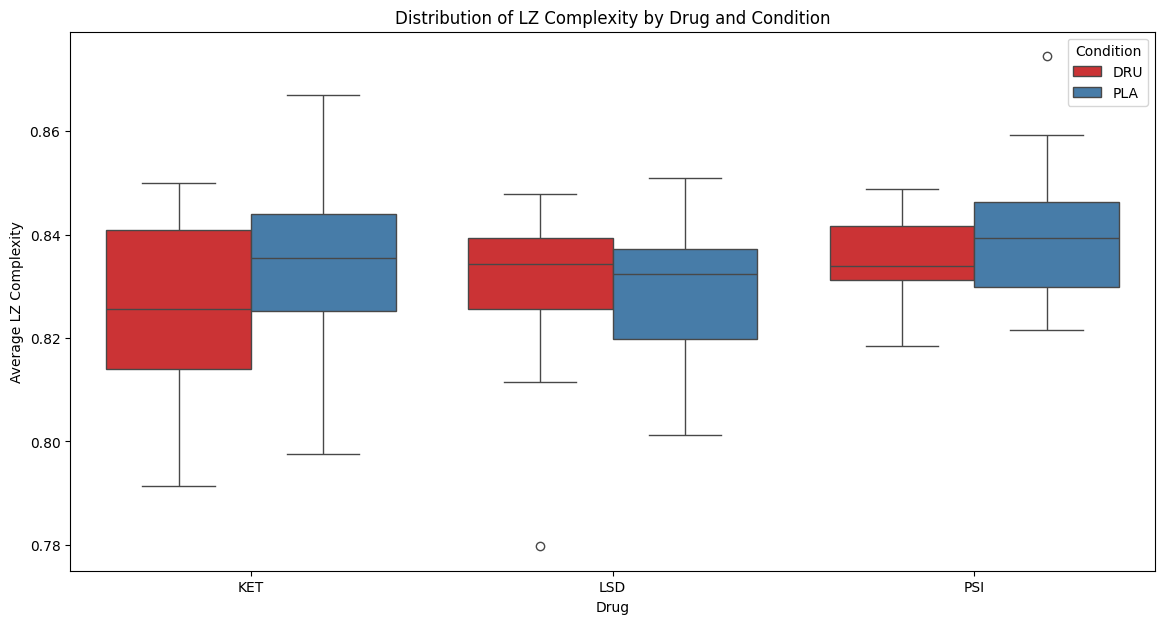

                        sum_sq    df         F    PR(>F)
C(Drug)               0.001147   2.0  2.475002  0.089875
C(Condition)          0.000673   1.0  2.903204  0.091854
C(Drug):C(Condition)  0.000553   2.0  1.193195  0.308002
Residual              0.020858  90.0       NaN       NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
KET DRU KET PLA   0.0102 0.3167 -0.0042 0.0246  False
KET DRU LSD DRU   0.0052 0.9185 -0.0101 0.0205  False
KET DRU LSD PLA   0.0039 0.9749 -0.0114 0.0193  False
KET DRU PSI DRU   0.0096 0.4765  -0.006 0.0252  False
KET DRU PSI PLA   0.0153 0.0578 -0.0003 0.0309  False
KET PLA LSD DRU   -0.005 0.9344 -0.0203 0.0104  False
KET PLA LSD PLA  -0.0062 0.8422 -0.0216 0.0091  False
KET PLA PSI DRU  -0.0006    1.0 -0.0162  0.015  False
KET PLA PSI PLA   0.0051 0.9301 -0.0105 0.0207  False
LSD DRU LSD PLA  -0.0013 0.9999 -0.0175 0.0149  False
LSD DRU PSI D

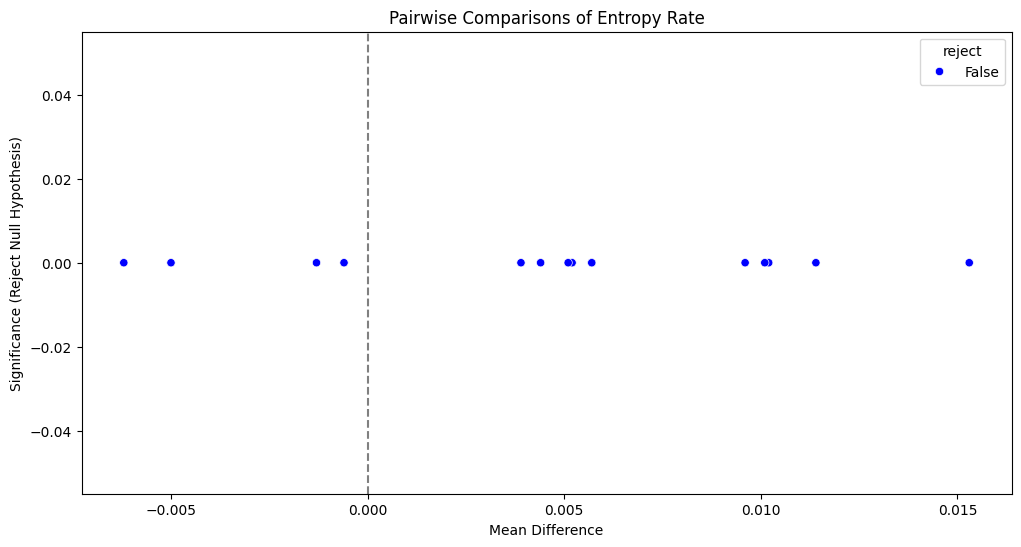

In [12]:
# Descriptive Statistics
# Rename the column header from 'psychedelic' to 'drug'
lempel_ziv_complexity.rename(columns={'Psychedelic': 'Drug'}, inplace=True)

# Rename columns to avoid issues with spaces or special characters
lempel_ziv_complexity.rename(columns={'LZ Complexity': 'LZ'}, inplace=True)


# Display the updated DataFrame to verify the change
print(lempel_ziv_complexity.head())


# Calculate mean and standard deviation per Drug and Condition
summary_stats = lempel_ziv_complexity.groupby(['Drug', 'Condition'])['LZ'].agg(['mean', 'std']).reset_index()
print(summary_stats)

# Visualization
# Plotting the distribution of EntropyRate by Drug and Condition
plt.figure(figsize=(12, 6))
sns.histplot(data=lempel_ziv_complexity, x='LZ', hue='Condition', multiple='stack', kde=True)
plt.title('Distribution of LZ Complexity by Condition')
plt.xlabel('LZ Complexity')
plt.ylabel('Density')
plt.show()


# Group the data by Participant, Drug, and Condition to calculate the mean EntropyRate for each participant
participant_avg_lz = lempel_ziv_complexity.groupby(['Subject', 'Drug', 'Condition'])['LZ'].mean().reset_index()

# Display the result
print(participant_avg_lz.head())

# Visualization: Box Plot
plt.figure(figsize=(14, 7))
sns.boxplot(data=participant_avg_lz, x='Drug', y='LZ', hue='Condition', palette='Set1')
plt.title('Distribution of LZ Complexity by Drug and Condition')
plt.xlabel('Drug')
plt.ylabel('Average LZ Complexity')
plt.legend(title='Condition')
plt.show()

# Perform ANOVA using the averaged participant data
model = ols('LZ ~ C(Drug) * C(Condition)', data=participant_avg_lz).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)


# Create a dataframe with the relevant columns for pairwise comparison
tukey = pairwise_tukeyhsd(endog=participant_avg_lz['LZ'],
                          groups=participant_avg_lz['Drug'] + ' ' + participant_avg_lz['Condition'],
                          alpha=0.05)

# Print the results of Tukey's HSD
print(tukey)


# Convert Tukey's HSD results to a DataFrame for easier plotting
tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

# Plot pairwise comparisons
plt.figure(figsize=(12, 6))
sns.scatterplot(x='meandiff', y='reject', hue='reject', data=tukey_df, palette={True: 'red', False: 'blue'})
plt.axvline(0, linestyle='--', color='grey')
plt.xlabel('Mean Difference')
plt.ylabel('Significance (Reject Null Hypothesis)')
plt.title('Pairwise Comparisons of Entropy Rate')
plt.show()

###3.1 REGIONAL ANALYSIS FOR LZ COMPLEXITY

             ROI Condition      mean       std
0      cingulate       DRU  0.822247  0.019865
1      cingulate       PLA  0.829267  0.025776
2        frontal       DRU  0.829191  0.015688
3        frontal       PLA  0.837265  0.011518
4         limbic       DRU  0.827585  0.022845
5         limbic       PLA  0.831267  0.030783
6      occipital       DRU  0.831426  0.017485
7      occipital       PLA  0.835771  0.012671
8       parietal       DRU  0.832955  0.017530
9       parietal       PLA  0.831458  0.020811
10  sensorimotor       DRU  0.825956  0.019014
11  sensorimotor       PLA  0.836761  0.013711
12   subcortical       DRU  0.826001  0.028262
13   subcortical       PLA  0.838351  0.020782
14      temporal       DRU  0.831788  0.014925
15      temporal       PLA  0.832165  0.011097


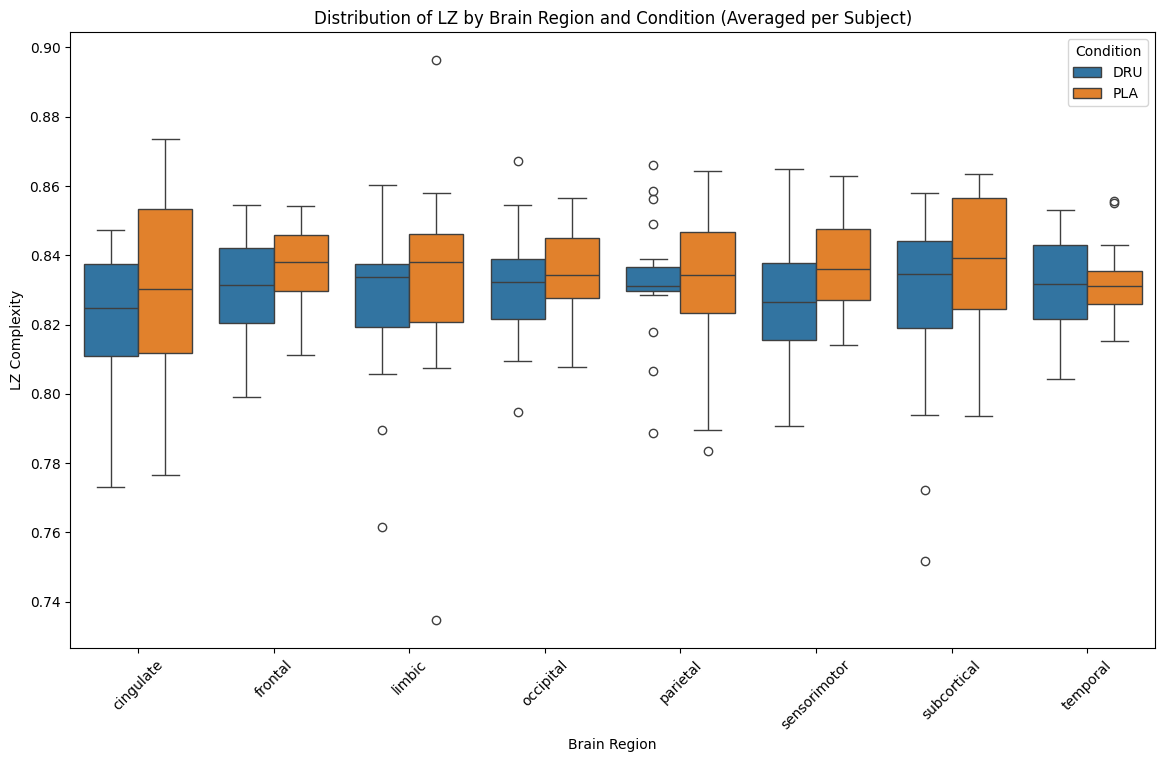

              sensorimotor   frontal  temporal  cingulate    limbic  \
sensorimotor           NaN  0.001294  0.000911   0.003692  0.000423   
frontal           0.001294       NaN  0.000383   0.004986  0.000871   
temporal          0.000911  0.000383       NaN   0.004603  0.000488   
cingulate         0.003692  0.004986  0.004603        NaN  0.004115   
limbic            0.000423  0.000871  0.000488   0.004115       NaN   
occipital         0.001512  0.000218  0.000601   0.005204  0.001089   
parietal          0.000260  0.001034  0.000651   0.003952  0.000163   
subcortical       0.002012  0.000718  0.001100   0.005704  0.001588   

              occipital  parietal  subcortical  
sensorimotor   0.001512  0.000260     0.002012  
frontal        0.000218  0.001034     0.000718  
temporal       0.000601  0.000651     0.001100  
cingulate      0.005204  0.003952     0.005704  
limbic         0.001089  0.000163     0.001588  
occipital           NaN  0.001251     0.000500  
parietal       0.

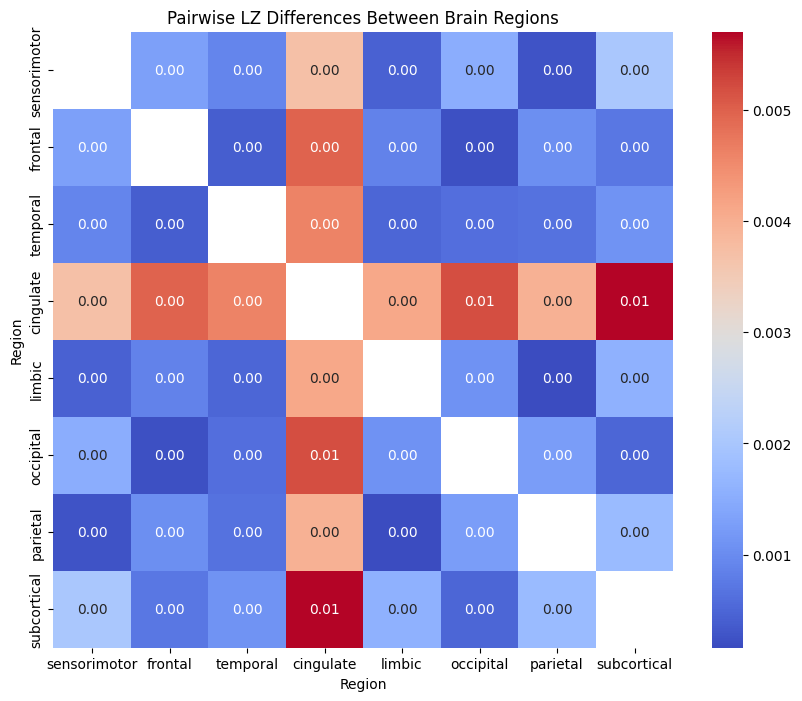

In [13]:
# Calculate the average entropy rate per subject, region, and condition
regional_subject_avg = lempel_ziv_complexity.groupby(['Subject', 'ROI', 'Condition'])['LZ'].mean().reset_index()

# Calculate the mean and standard deviation of these regional averages
regional_summary_stats_subject = regional_subject_avg.groupby(['ROI', 'Condition'])['LZ'].agg(['mean', 'std']).reset_index()

print(regional_summary_stats_subject)

#Box plot visualization
plt.figure(figsize=(14, 8))
sns.boxplot(data=regional_subject_avg, x='ROI', y='LZ', hue='Condition')
plt.title('Distribution of LZ by Brain Region and Condition (Averaged per Subject)')
plt.xlabel('Brain Region')
plt.ylabel('LZ Complexity')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.show()

# Example of a pairwise regional comparison

# Create a matrix to hold pairwise LZ comparisons
regions = lempel_ziv_complexity['ROI'].unique()
pairwise_lz = pd.DataFrame(index=regions, columns=regions, dtype=float)

for region1 in regions:
    for region2 in regions:
        if region1 != region2:
            # Compare mean LZ between two regions
            mean_entropy_region1 = lempel_ziv_complexity[lempel_ziv_complexity['ROI'] == region1]['LZ'].mean()
            mean_entropy_region2 = lempel_ziv_complexity[lempel_ziv_complexity['ROI'] == region2]['LZ'].mean()
            pairwise_lz.loc[region1, region2] = np.abs(mean_entropy_region1 - mean_entropy_region2)

# Display the pairwise differences table
print(pairwise_lz)

# Plot the pairwise LZ differences
plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_lz, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pairwise LZ Differences Between Brain Regions')
plt.xlabel('Region')
plt.ylabel('Region')
plt.show()

### 4.Comparative Analysis: Lempel-Ziv Complexity (LZ) vs. CSER

This analysis compares Lempel-Ziv Complexity (LZ) and Complex Spectral Entropy Rate (CSER) by integrating their datasets, performing correlation analysis, and visualizing their relationships.

In [14]:
#Ensuring consistency in formatting before merging LZ & CSER dataframes for comparison


# Define a function to perform random sampling
def sample_channels_per_roi(df, roi_col='ROI_Region', channel_col='Channel', num_samples=3):
    # Create an empty DataFrame to store the sampled data
    sampled_df = pd.DataFrame()

    # Get unique ROIs
    rois = df[roi_col].unique()

    for roi in rois:
        # Filter data for the current ROI
        roi_df = df[df[roi_col] == roi]

        # Check if there are enough channels to sample
        if len(roi_df[channel_col].unique()) >= num_samples:
            # Sample channels
            sampled_channels = np.random.choice(roi_df[channel_col].unique(), num_samples, replace=False)

            # Filter data for the sampled channels
            sampled_roi_df = roi_df[roi_df[channel_col].isin(sampled_channels)]

            # Append sampled data to the final DataFrame
            sampled_df = pd.concat([sampled_df, sampled_roi_df])
        else:
            print(f"Not enough channels to sample for ROI {roi}")

    return sampled_df

# Perform random sampling
new_CSER = sample_channels_per_roi(CSER, roi_col='ROI_Region', channel_col='Channel', num_samples=3)

# Display the new CSER subset
print(new_CSER)

#Display LZ dataframe to confirm column consistency
print(lempel_ziv_complexity)

     Drug  Subject  Channel Condition  EntropyRate    ROI_Region
16    LSD        1       17   Placebo    -0.082231  sensorimotor
56    LSD        1       57   Placebo    -0.363894  sensorimotor
57    LSD        1       58   Placebo    -0.204402  sensorimotor
106   LSD        1       17      Drug    -0.053022  sensorimotor
146   LSD        1       57      Drug    -0.170145  sensorimotor
...   ...      ...      ...       ...          ...           ...
8533  PSI       14       74   Placebo    -0.246246   subcortical
8536  PSI       14       77   Placebo    -0.309528   subcortical
8620  PSI       14       71      Drug    -0.057929   subcortical
8623  PSI       14       74      Drug    -0.121039   subcortical
8626  PSI       14       77      Drug    -0.019051   subcortical

[2304 rows x 6 columns]
     Drug Condition  Subject  Channel           ROI        LZ
0     LSD       DRU       15       57  sensorimotor  0.808898
1     LSD       DRU       15       18  sensorimotor  0.844442
2     LSD

In [15]:
#Restructure condition elements in LZ dataframe to ensure consistency
new_CSER['Condition'] = new_CSER['Condition'].replace({'Drug': 'DRU', 'Placebo': 'PLA'})

# Check columns in both dataframes
print("CSER Columns:", new_CSER.columns)
print("LZC Columns:", lempel_ziv_complexity.columns)

# Ensure both dataframes have the same columns
common_columns = set(new_CSER.columns).intersection(set(lempel_ziv_complexity.columns))
print("Common Columns:", common_columns)

print(new_CSER)
print(lempel_ziv_complexity)

CSER Columns: Index(['Drug', 'Subject', 'Channel', 'Condition', 'EntropyRate', 'ROI_Region'], dtype='object')
LZC Columns: Index(['Drug', 'Condition', 'Subject', 'Channel', 'ROI', 'LZ'], dtype='object')
Common Columns: {'Subject', 'Condition', 'Drug', 'Channel'}
     Drug  Subject  Channel Condition  EntropyRate    ROI_Region
16    LSD        1       17       PLA    -0.082231  sensorimotor
56    LSD        1       57       PLA    -0.363894  sensorimotor
57    LSD        1       58       PLA    -0.204402  sensorimotor
106   LSD        1       17       DRU    -0.053022  sensorimotor
146   LSD        1       57       DRU    -0.170145  sensorimotor
...   ...      ...      ...       ...          ...           ...
8533  PSI       14       74       PLA    -0.246246   subcortical
8536  PSI       14       77       PLA    -0.309528   subcortical
8620  PSI       14       71       DRU    -0.057929   subcortical
8623  PSI       14       74       DRU    -0.121039   subcortical
8626  PSI       14    

   Subject Condition Drug        ROI  EntropyRate        LZ
0        1       DRU  KET  cingulate    -0.344350  0.803367
1        1       DRU  KET    frontal    -0.107566  0.825186
2        1       DRU  KET     limbic    -0.186732  0.816606
3        1       DRU  KET  occipital    -0.491059  0.848263
4        1       DRU  KET   parietal    -0.410783  0.832647

Correlation Matrix between Aggregated EntropyRate and LZ:
             EntropyRate        LZ
EntropyRate     1.000000 -0.032893
LZ             -0.032893  1.000000


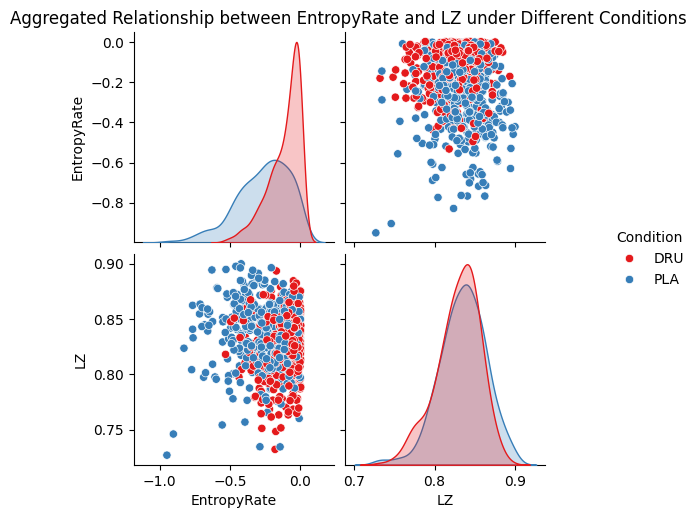

In [16]:
#AGGREGATE & MERGE THE DATASETS

# Aggregating the new_CSER dataset
aggregated_CSER = new_CSER.groupby(['Subject', 'Condition', 'Drug', 'ROI_Region']).agg({'EntropyRate': 'mean'}).reset_index()

# Aggregating the LZC dataset
aggregated_LZ = lempel_ziv_complexity.groupby(['Subject', 'Condition', 'Drug', 'ROI']).agg({'LZ': 'mean'}).reset_index()

# Rename 'ROI_Region' to 'ROI' in the aggregated_CSER for merging
aggregated_CSER.rename(columns={'ROI_Region': 'ROI'}, inplace=True)

# Merge the aggregated datasets on 'Subject', 'Condition', 'Drug', and 'ROI'
merged_data = pd.merge(aggregated_CSER, aggregated_LZ, on=['Subject', 'Condition', 'Drug', 'ROI'])

# Display the merged dataset to verify the result
print(merged_data.head())


#CORRELATION & VISUALIZATION

# Compute the correlation matrix for the merged data
correlation_matrix = merged_data[['EntropyRate', 'LZ']].corr()

# Print the correlation matrix
print("\nCorrelation Matrix between Aggregated EntropyRate and LZ:")
print(correlation_matrix)

# Visualize the relationship between aggregated EntropyRate and LZ

sns.pairplot(merged_data, hue='Condition', vars=['EntropyRate', 'LZ'], palette='Set1')
plt.suptitle('Aggregated Relationship between EntropyRate and LZ under Different Conditions', y=1.02)
plt.show()


### STATISTICAL TESTING OF RELATIONSHIPS

Spearman's Rank Correlation: coefficient = -0.04280704232456177, p-value = 0.23605127470199458


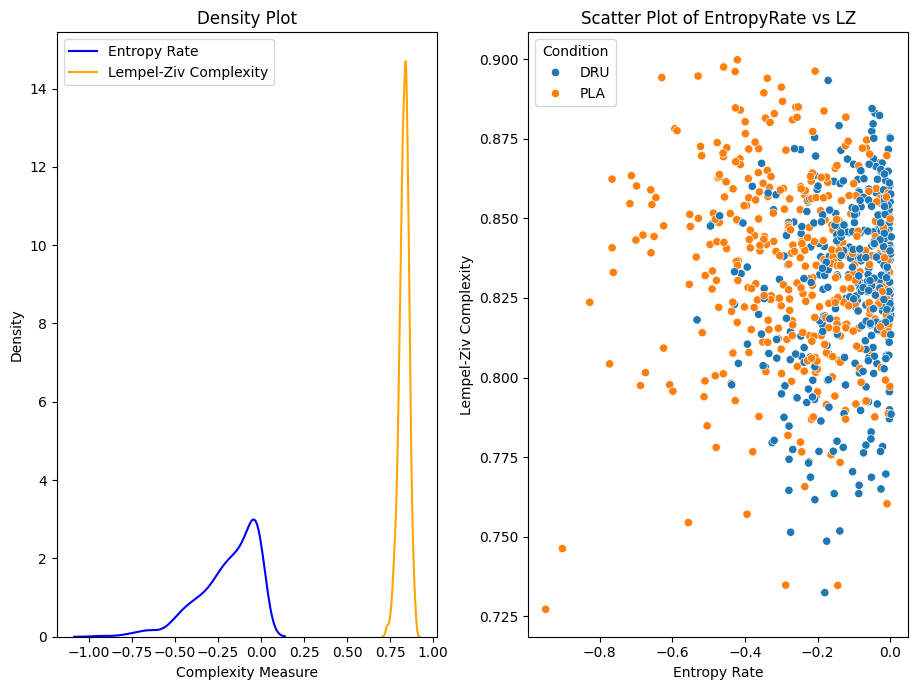

In [17]:
# Spearman's rank correlation
spearman_corr, spearman_p_value = stats.spearmanr(merged_data['EntropyRate'], merged_data['LZ'])
print(f"Spearman's Rank Correlation: coefficient = {spearman_corr}, p-value = {spearman_p_value}")

# Visualizations
plt.figure(figsize=(14, 7))

# 1. Histogram/Density Plot for both EntropyRate and LZ
plt.subplot(1, 3, 1)
sns.kdeplot(merged_data['EntropyRate'], label='Entropy Rate', color='blue')
sns.kdeplot(merged_data['LZ'], label='Lempel-Ziv Complexity', color='orange')
plt.title('Density Plot')
plt.xlabel('Complexity Measure')
plt.legend()

# 2. Scatter Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=merged_data['EntropyRate'], y=merged_data['LZ'], hue=merged_data['Condition'])
plt.title('Scatter Plot of EntropyRate vs LZ')
plt.xlabel('Entropy Rate')
plt.ylabel('Lempel-Ziv Complexity')
plt.tight_layout()
plt.show()


Spearman's Rank Correlation for KET: coefficient = -0.0738, p-value = 0.1994
Spearman's Rank Correlation for LSD: coefficient = -0.0040, p-value = 0.9504
Spearman's Rank Correlation for PSI: coefficient = -0.1287, p-value = 0.0545


<Figure size 1000x600 with 0 Axes>

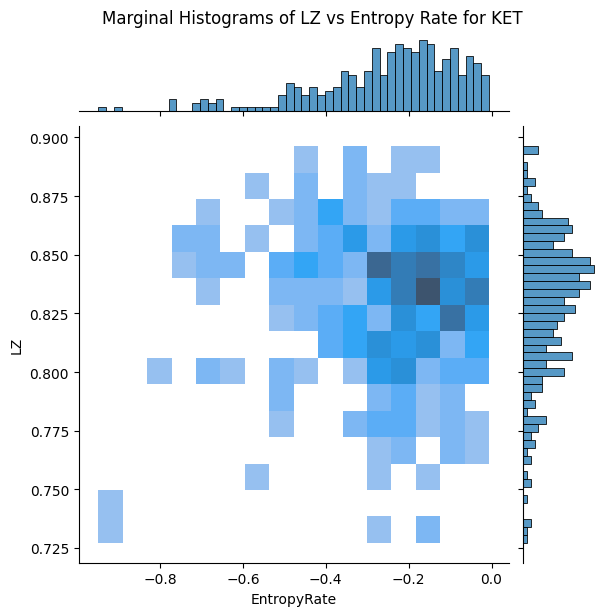

<Figure size 1000x600 with 0 Axes>

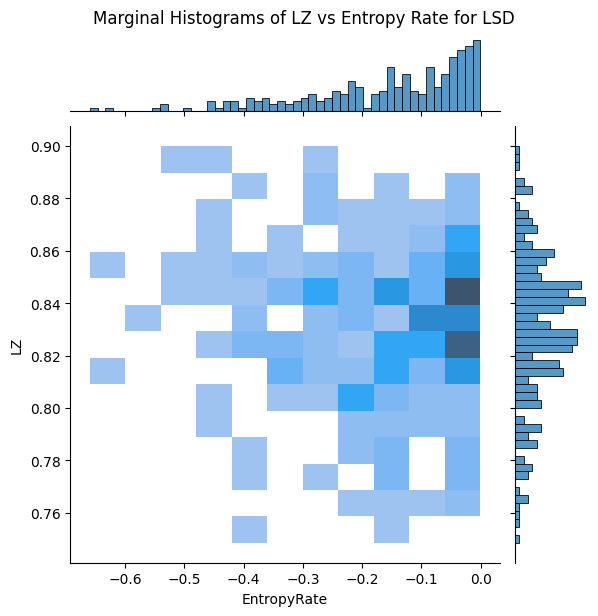

<Figure size 1000x600 with 0 Axes>

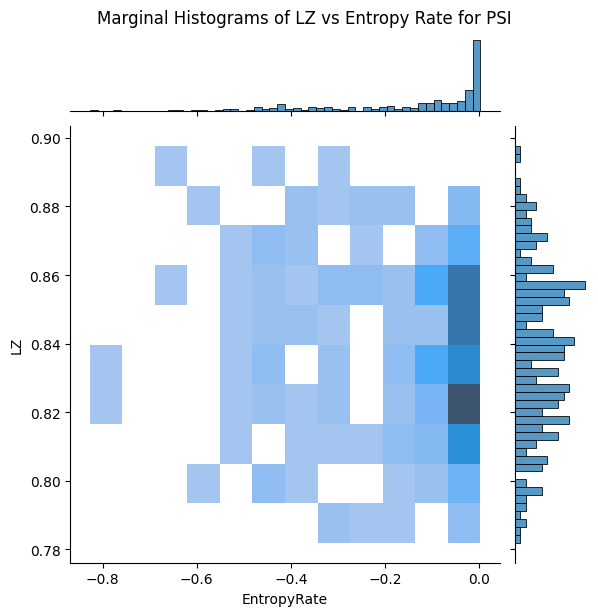

In [18]:
# Filter data by drug for drug specific analysis
drugs = merged_data['Drug'].unique()

# Create a dictionary to store filtered DataFrames for each drug
drug_dfs = {drug: merged_data[merged_data['Drug'] == drug] for drug in drugs}

# Dictionary to store correlation results
correlation_results = {}

for drug, df in drug_dfs.items():
    # Drop rows with missing values
    df_clean = df.dropna(subset=['EntropyRate', 'LZ'])

    if df_clean.empty:
        correlation_results[drug] = {'correlation': None, 'p-value': None}
        continue

    # Compute Spearman's rank correlation
    corr, p_value = spearmanr(df_clean['EntropyRate'], df_clean['LZ'])
    correlation_results[drug] = {'correlation': corr, 'p-value': p_value}

    print(f"Spearman's Rank Correlation for {drug}: coefficient = {corr:.4f}, p-value = {p_value:.4f}")


# Create a scatter plot for each drug
for drug, df in drug_dfs.items():
    df_clean = df.dropna(subset=['EntropyRate', 'LZ'])

    plt.figure(figsize=(10, 6))
    g = sns.jointplot(data=df_clean, x='EntropyRate', y='LZ', kind='hist', marginal_kws=dict(bins=50, fill=True))
    g.fig.suptitle(f'Marginal Histograms of LZ vs Entropy Rate for {drug}', y=1.02)
    plt.show()

## 5. MACHINE LEARNING MODELS

### 5.1 MODEL TYPE EVALUATION & SELECTION

This section involves preprocessing the data, building machine learning pipelines, and evaluating model performance using Logistic Regression and Support Vector Machine (SVM). The focus is on predicting conditions based on features derived from Entropy Rate and Lempel-Ziv Complexity (LZ).


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       119
           1       0.66      0.64      0.65       112

    accuracy                           0.67       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.67      0.67      0.67       231



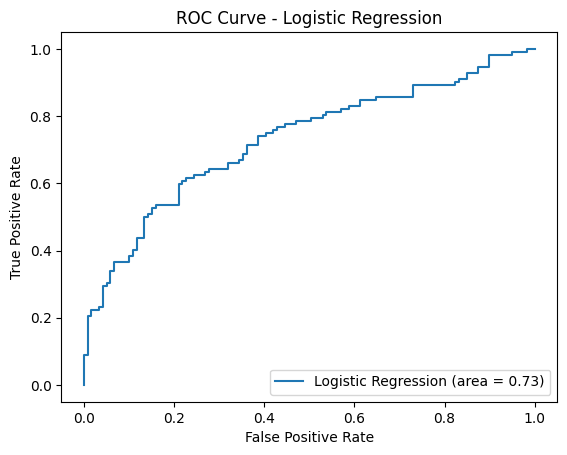

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       119
           1       0.67      0.64      0.65       112

    accuracy                           0.67       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.67      0.67      0.67       231



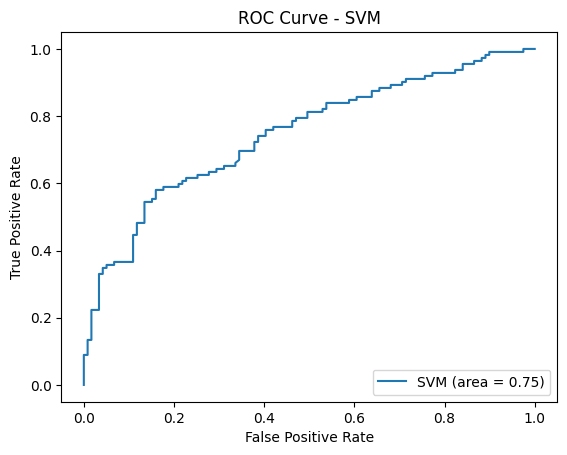

In [21]:
#Preprocessing & Building out pipelines to test performance of models before selection of main

# Define the preprocessing function
def preprocess_data(data):
    """Preprocess the data by normalizing and scaling."""
    features = ['EntropyRate', 'LZ']
    X = data[features]
    y = data['Condition']

    # Convert categorical labels to binary
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)  # Convert to 0 and 1

    # Initialize and apply the scaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return pd.DataFrame(X_scaled, columns=features), y_encoded


# Preprocess the data
X, y = preprocess_data(merged_data)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define pipelines for Logistic Regression and Support Vector Machine
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Scaling step
    ('logreg', LogisticRegression(random_state=42))  # Logistic Regression step
])

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  # Scaling step
    ('svm', SVC(probability=True, random_state=42))  # SVM step
])

# Train models
pipeline_lr.fit(X_train, y_train)
pipeline_svm.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_lr = pipeline_lr.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# ROC Curve for Logistic Regression
y_prob_lr = pipeline_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (area = {roc_auc_lr:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Evaluate SVM
y_pred_svm = pipeline_svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# ROC Curve for SVM
y_prob_svm = pipeline_svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, label=f'SVM (area = {roc_auc_svm:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()


### 5.3  Implementation of selected (most efficient) model: Logistic Regression.

Best Parameters: {'log_reg__C': 0.01, 'log_reg__penalty': 'l2', 'log_reg__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.67      0.77      0.72       116
         PLA       0.73      0.63      0.67       115

    accuracy                           0.70       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.70      0.70      0.70       231



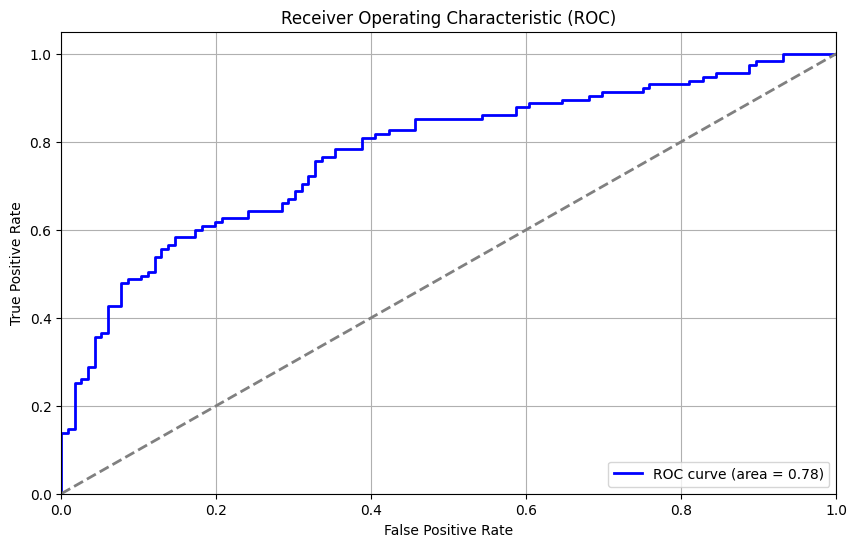

Cross-Validation Accuracy Scores: [0.69480519 0.66233766 0.71428571 0.65359477 0.69281046]
Mean Cross-Validation Accuracy: 0.6835667600373483


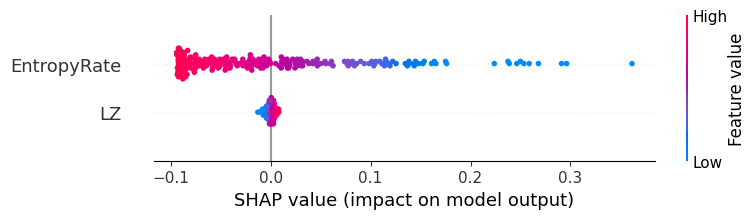

In [24]:

# Define the full pipeline
def create_pipeline():
    # Initialize the model
    log_reg = LogisticRegression(max_iter=1000)

    # Create the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),   # Scaling
        ('log_reg', log_reg)            # Model
    ])

    return pipeline

# Define the hyperparameters to tune
param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'log_reg__solver': ['liblinear', 'saga'],  # 'liblinear' for smaller datasets and 'saga' for larger ones
    'log_reg__penalty': ['l1', 'l2']
}

# Preprocess the data
def preprocess_data(data):
    """Preprocess the data by normalizing and scaling."""
    features = ['EntropyRate', 'LZ']
    X = data[features]
    y = data['Condition']

    # Encode the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    return X, y_encoded, le

# Load and preprocess the data
X, y, le = preprocess_data(merged_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create the pipeline
pipeline = create_pipeline()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_pipeline = grid_search.best_estimator_

# Predict on the test set
y_pred = best_pipeline.predict(X_test)
y_prob = best_pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Cross-Validation Scores
cv_scores = cross_val_score(best_pipeline, X, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")



# SHAP Values
# Create a SHAP explainer
explainer = shap.Explainer(best_pipeline.named_steps['log_reg'], X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Plot SHAP summary
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=['EntropyRate', 'LZ'])


# Assuming shap_values is already computed from the SHAP explainer
shap_values = explainer(X_test)


###5.3 Building Participant-Level Logistic Regression Models for Each Drug

In this section, we will create logistic regression models for each drug type to predict the condition based on features derived from Entropy Rate and Lempel-Ziv Complexity (LZ). The goal is to analyze how each drug affects the predictive model.

Drug: KET, Participant: 1
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.33      0.50         3
         PLA       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



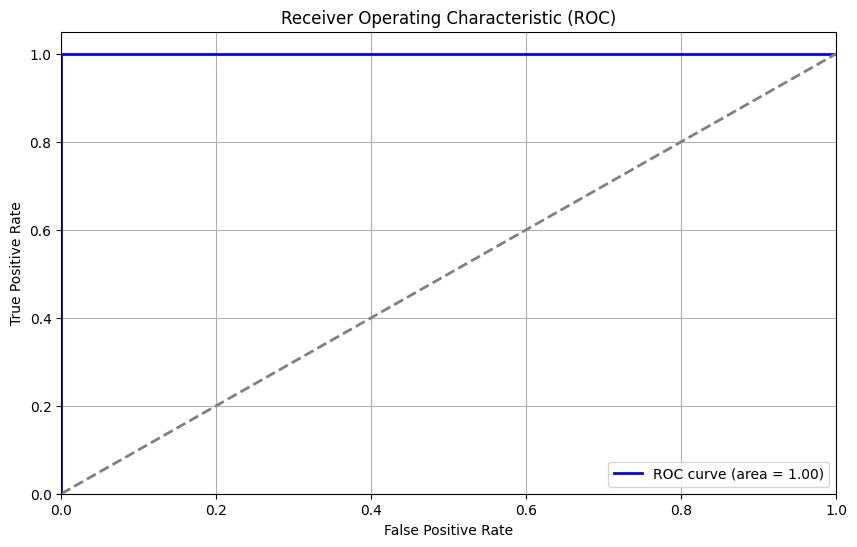

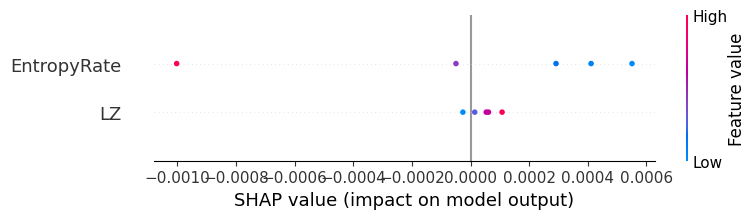

Drug: KET, Participant: 2
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.67      0.67      0.67         3
         PLA       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



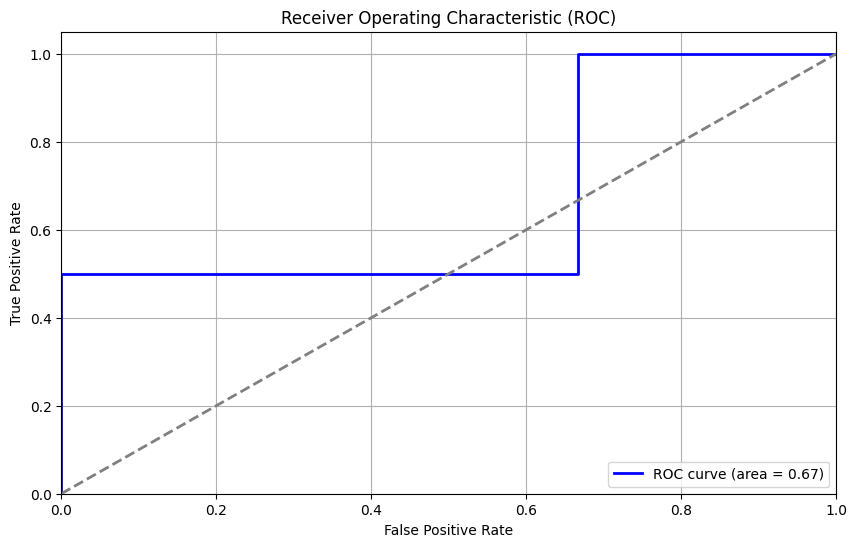

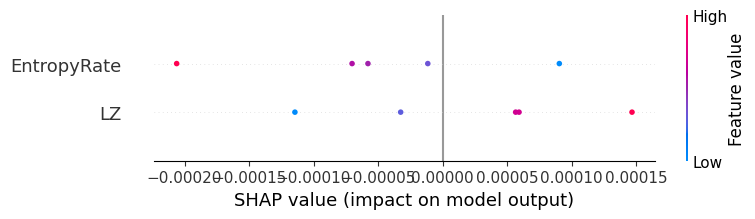

Drug: KET, Participant: 3
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.67      0.80         3
         PLA       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



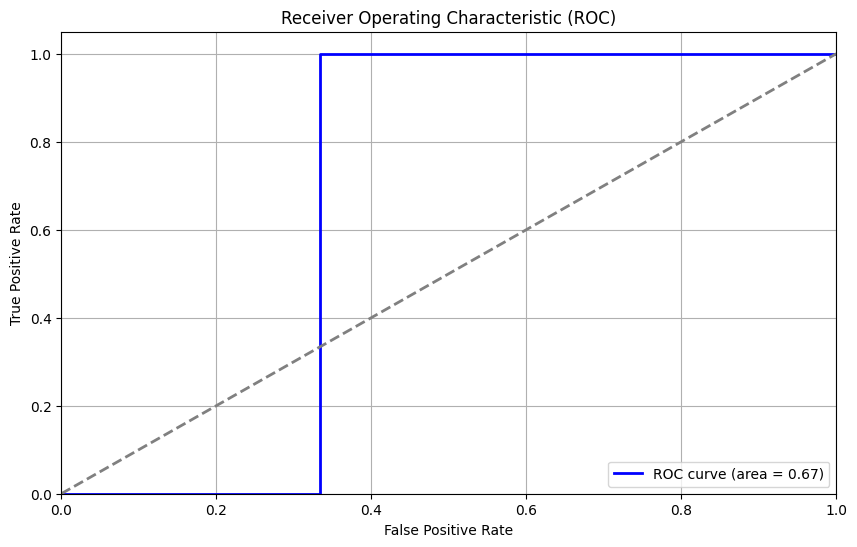

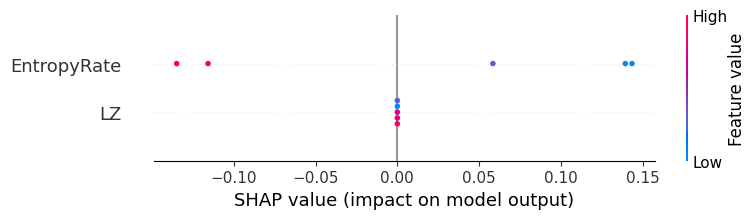

Drug: KET, Participant: 4
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.33      0.33      0.33         3
         PLA       0.00      0.00      0.00         2

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5



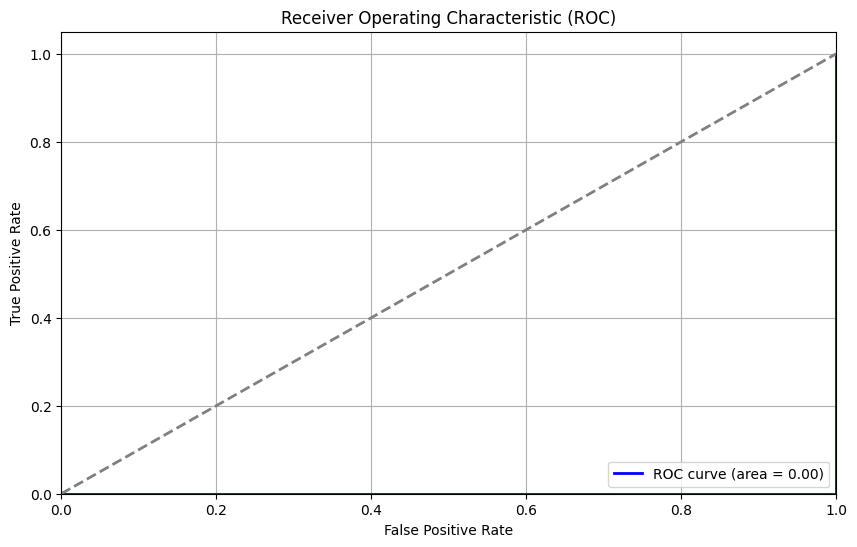

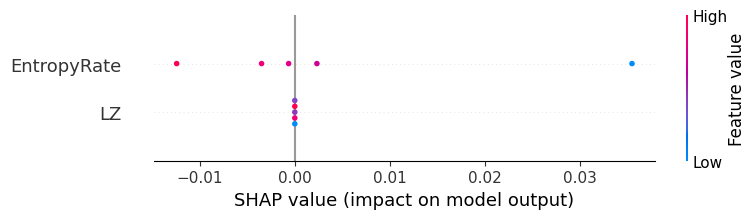

Drug: KET, Participant: 5
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



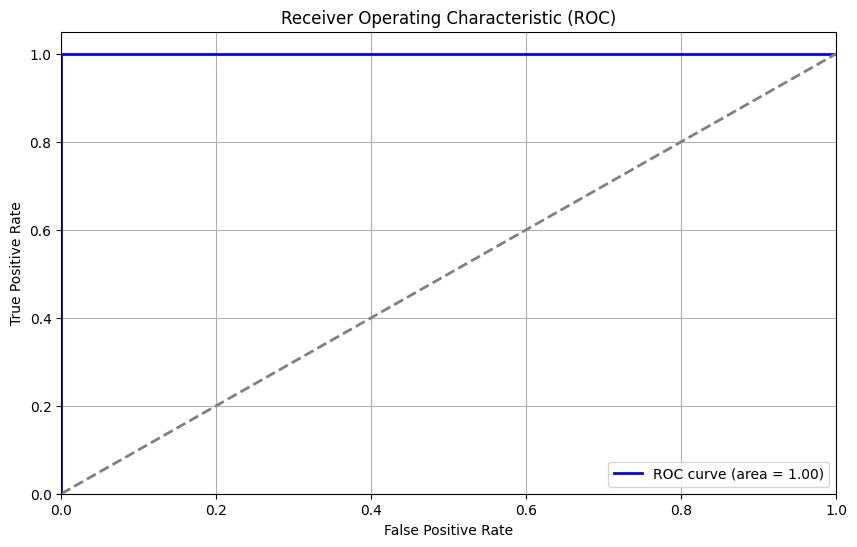

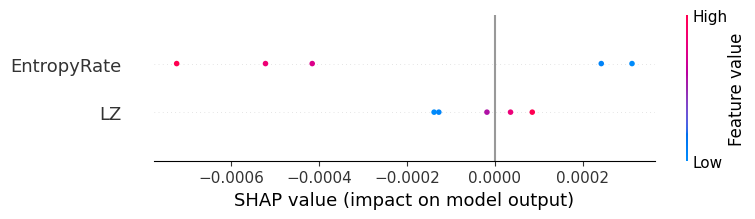

Drug: KET, Participant: 6
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.33      0.50         3
         PLA       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



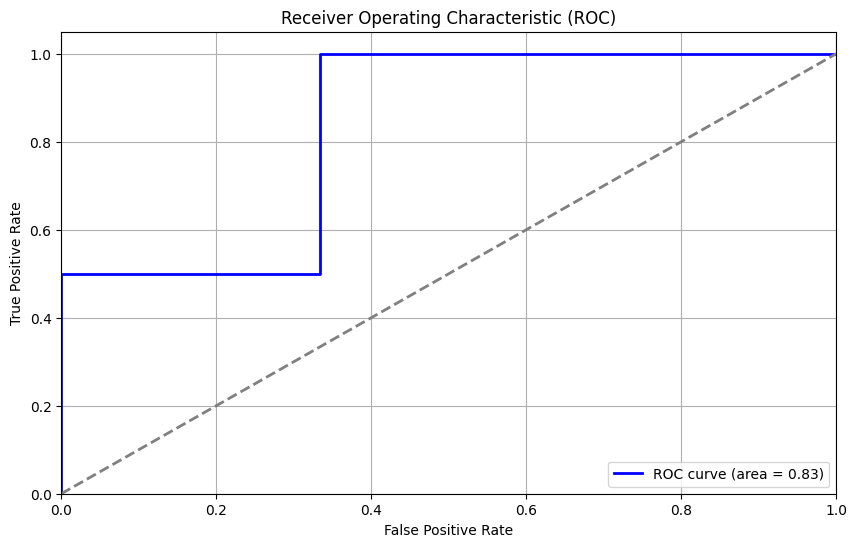

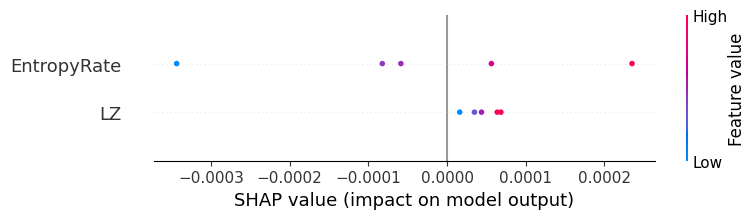

Drug: KET, Participant: 7
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



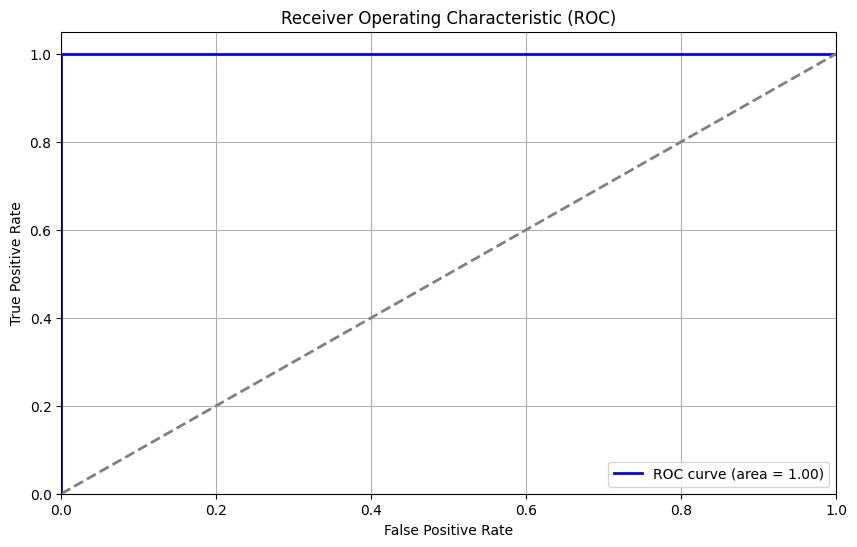

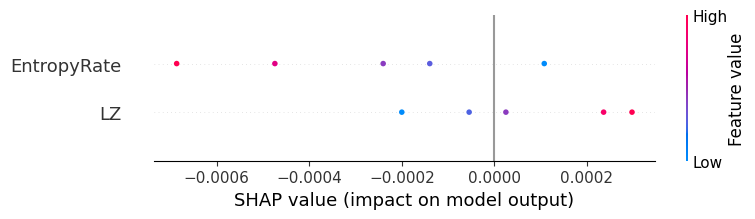

Drug: KET, Participant: 8
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.75      1.00      0.86         3
         PLA       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



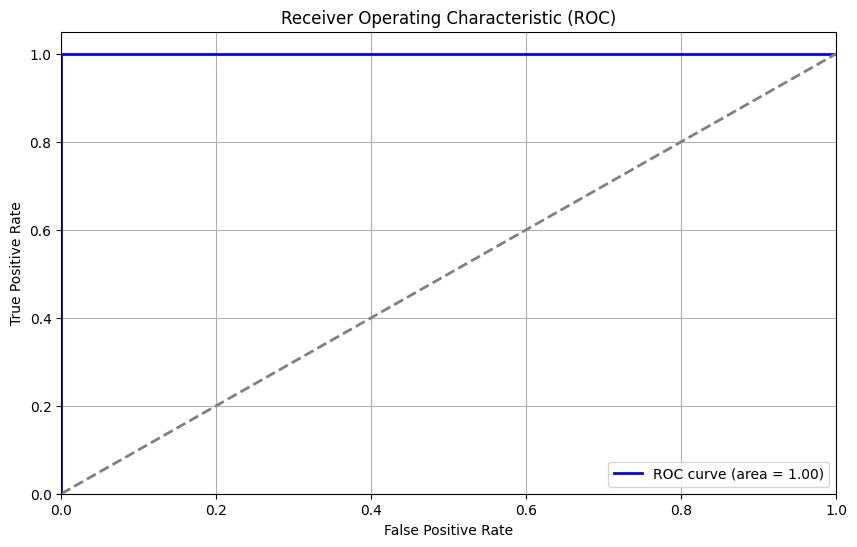

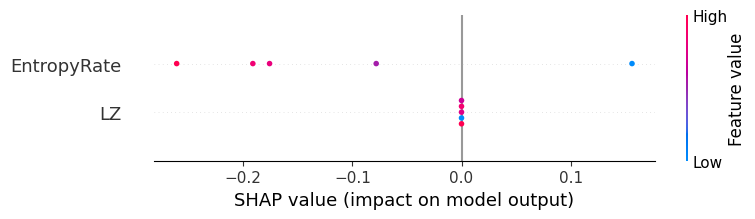

Drug: KET, Participant: 9
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



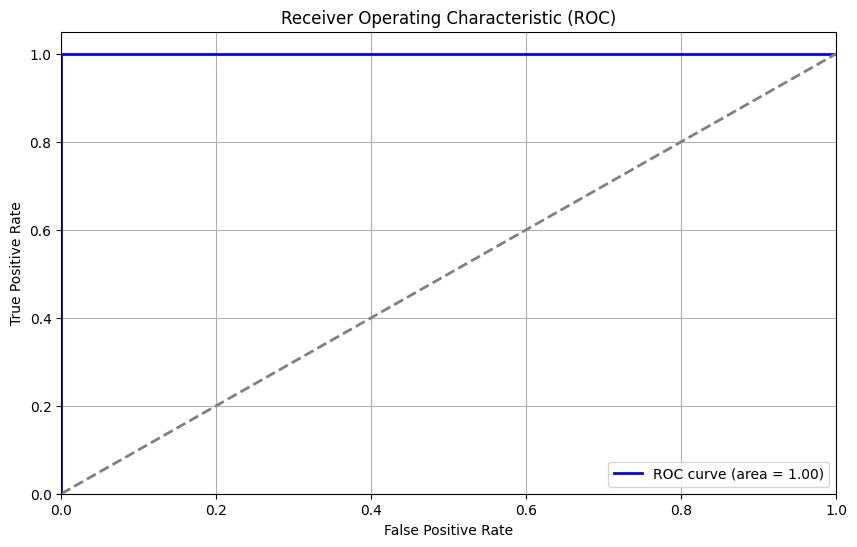

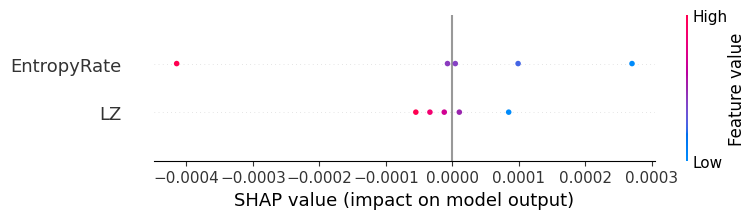

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Drug: KET, Participant: 10
Best Parameters: {'clf__C': 10, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



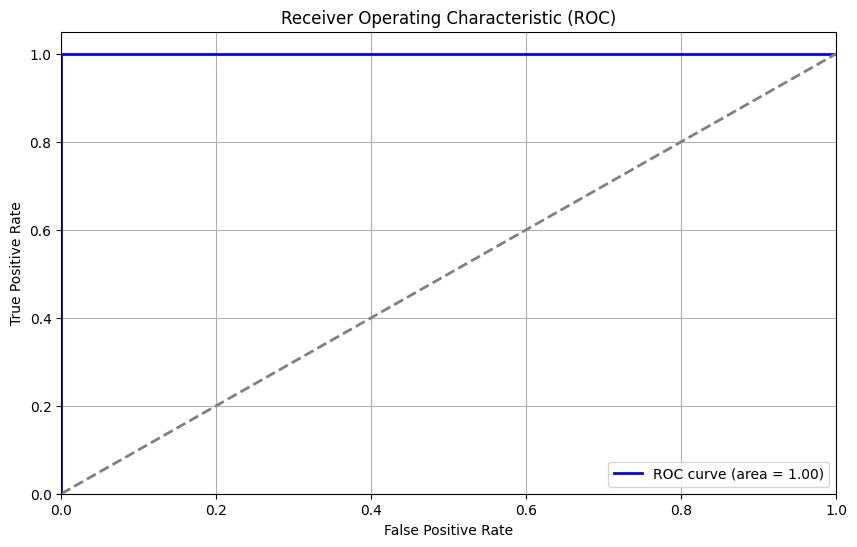

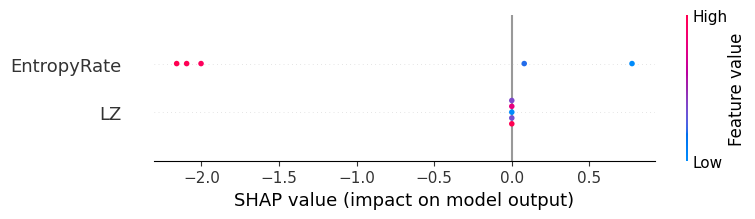

Drug: KET, Participant: 11
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.67      0.80         3
         PLA       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



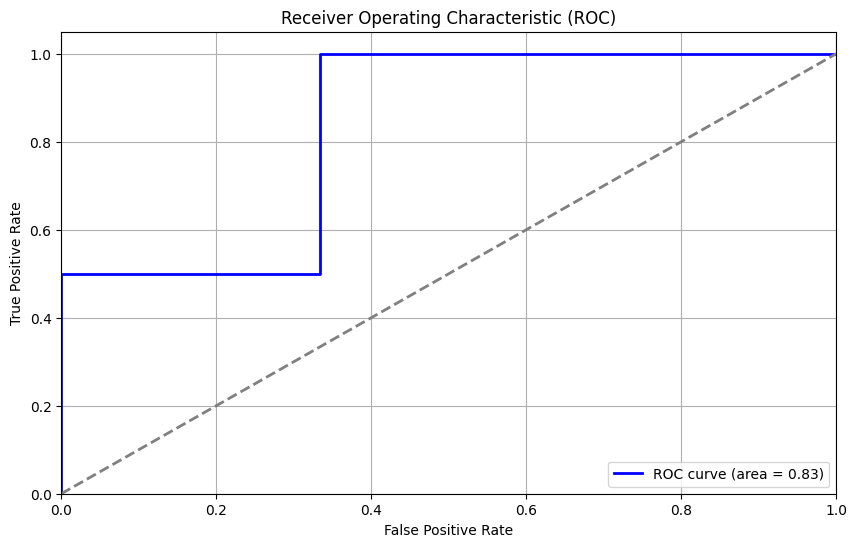

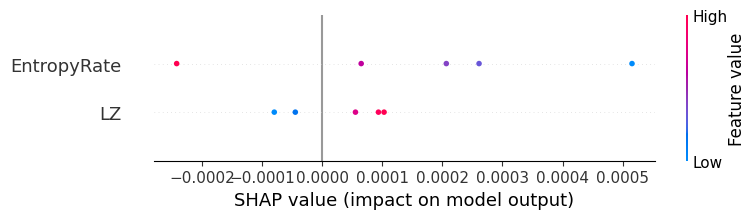

Drug: KET, Participant: 12
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.75      1.00      0.86         3
         PLA       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



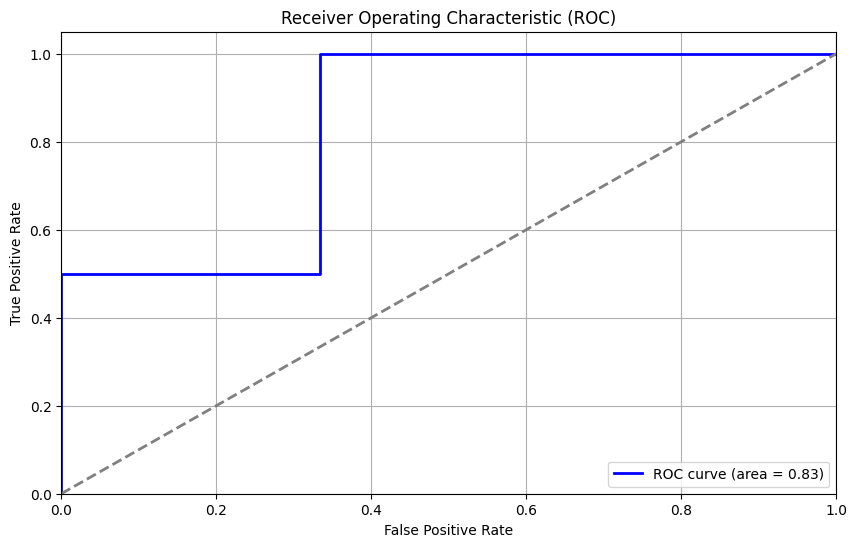

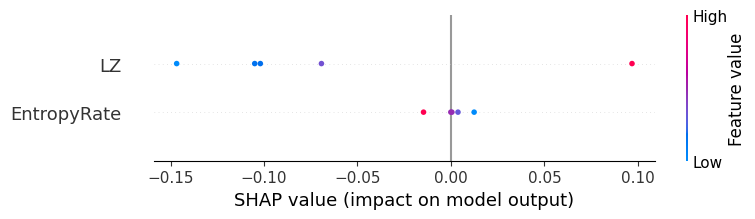

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Drug: KET, Participant: 13
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.00      0.00      0.00         3
         PLA       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



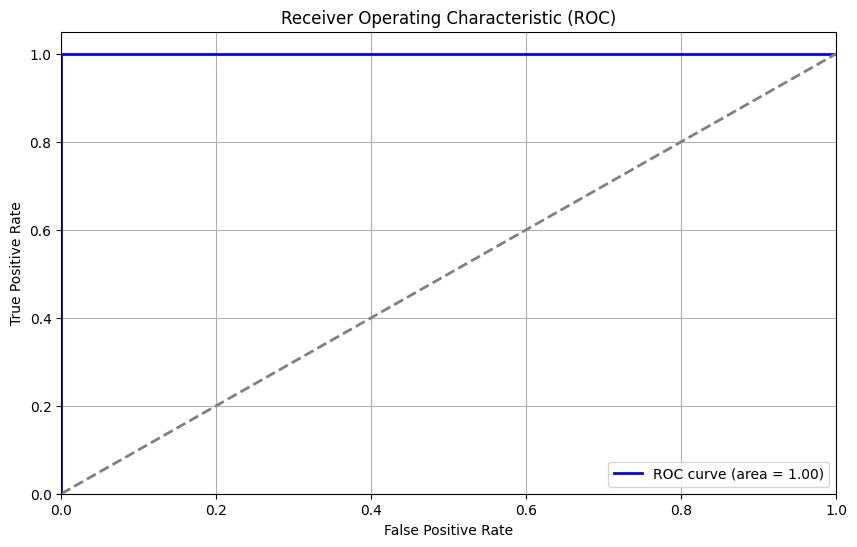

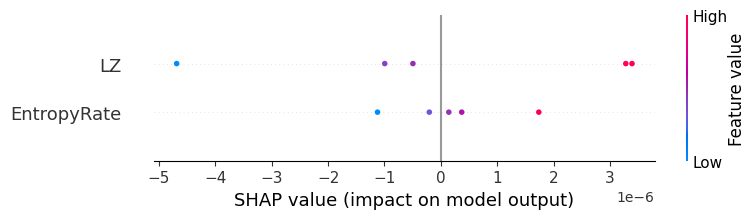

Drug: KET, Participant: 14
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



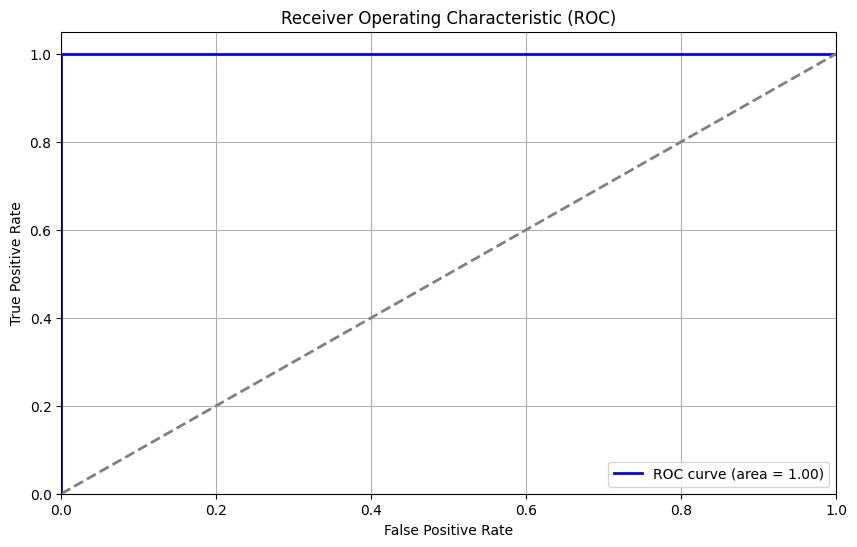

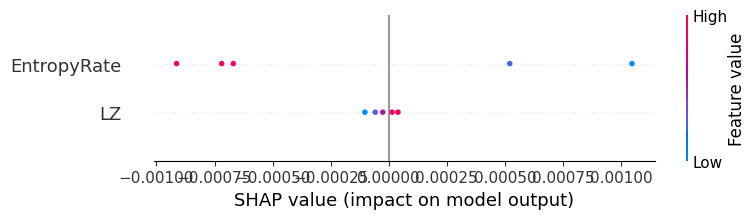

Drug: KET, Participant: 15
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.75      1.00      0.86         3
         PLA       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



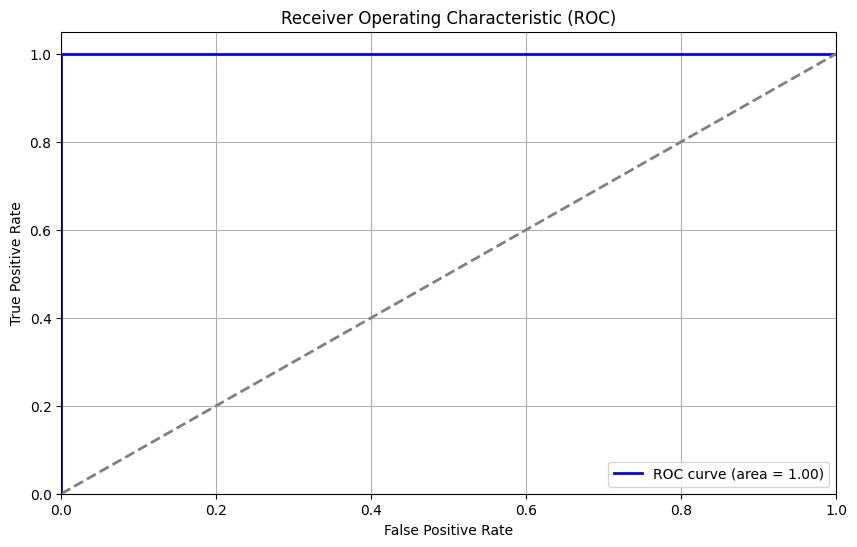

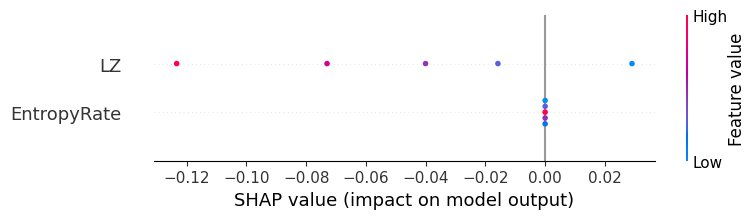

Drug: KET, Participant: 16
Best Parameters: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.50      0.33      0.40         3
         PLA       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5



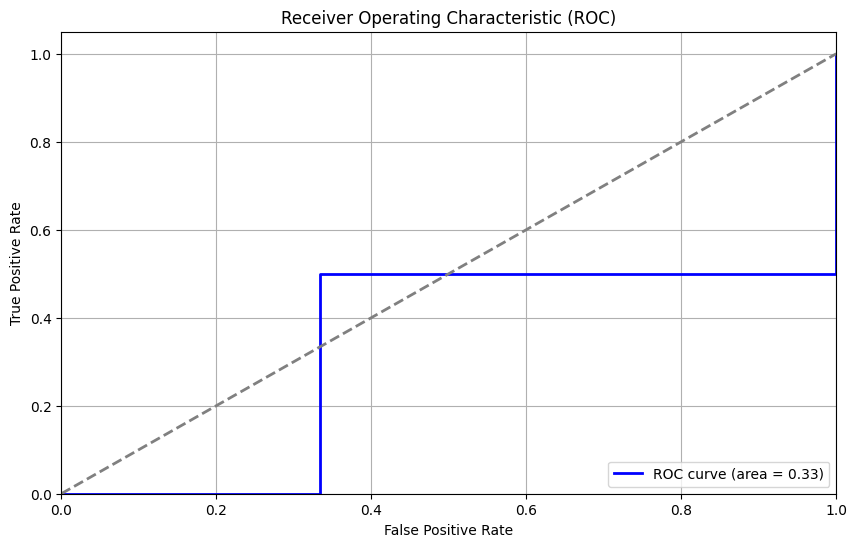

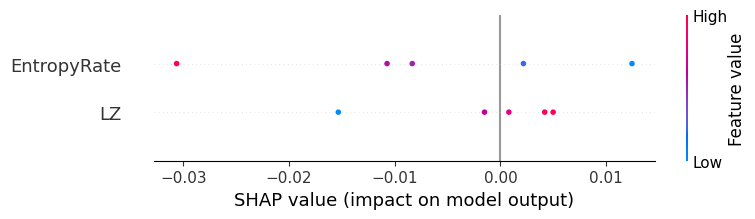

Drug: KET, Participant: 17
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.60      1.00      0.75         3
         PLA       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


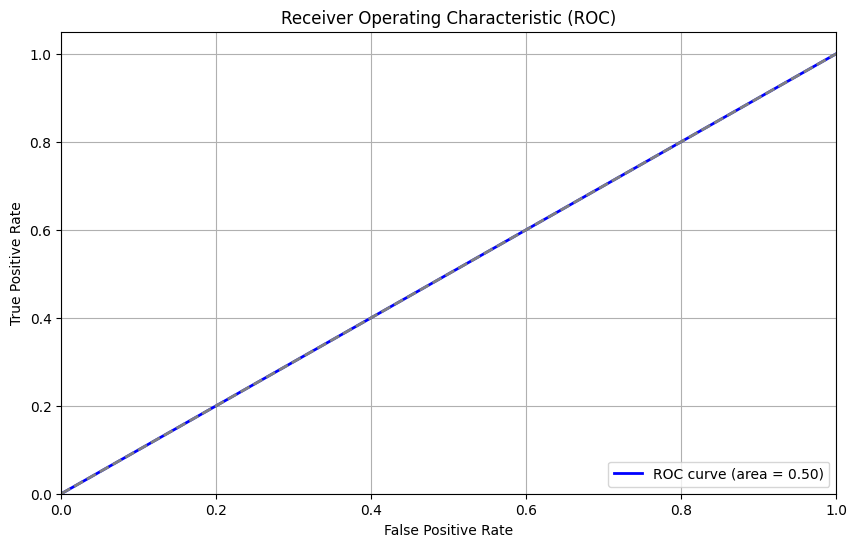

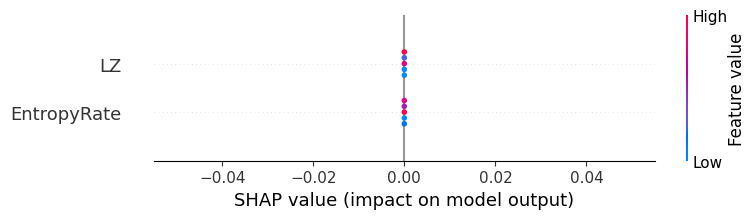

Drug: KET, Participant: 18
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.67      0.80         3
         PLA       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



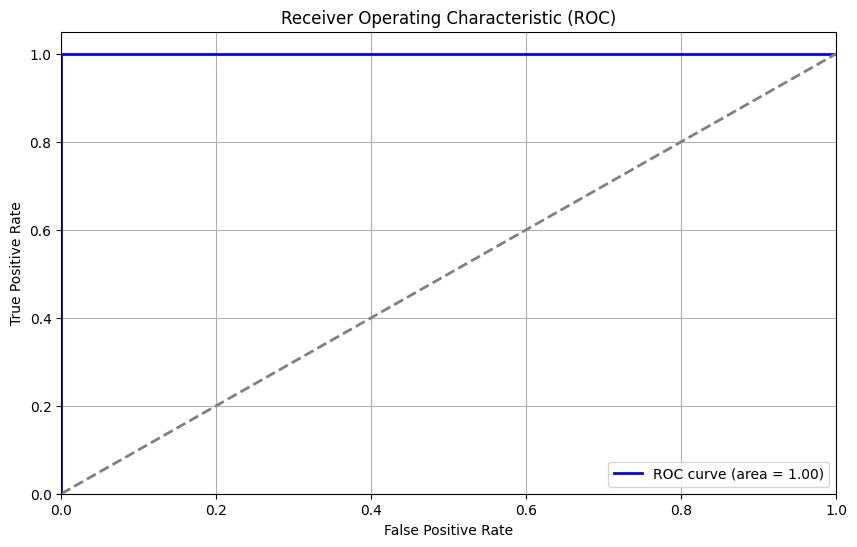

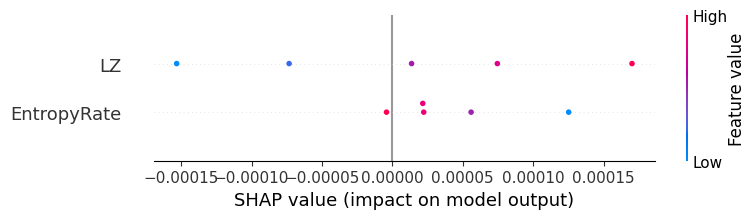

Drug: KET, Participant: 19
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.33      0.50         3
         PLA       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



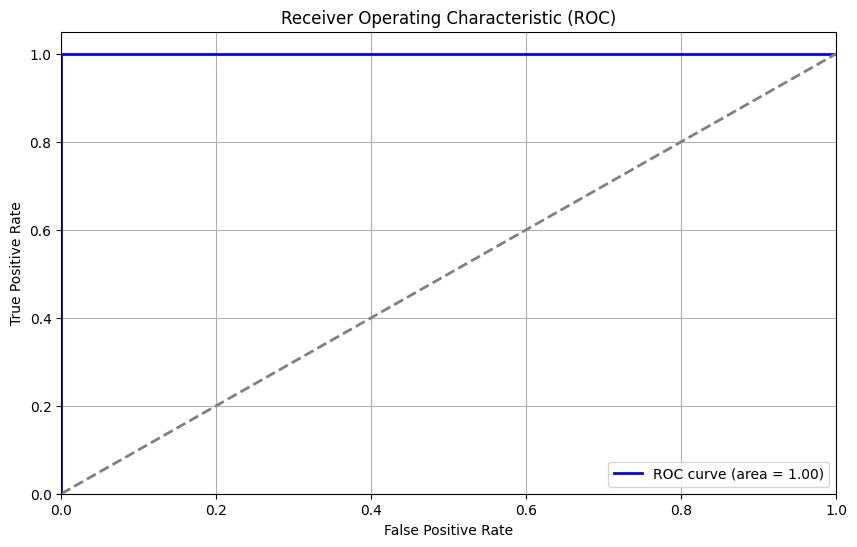

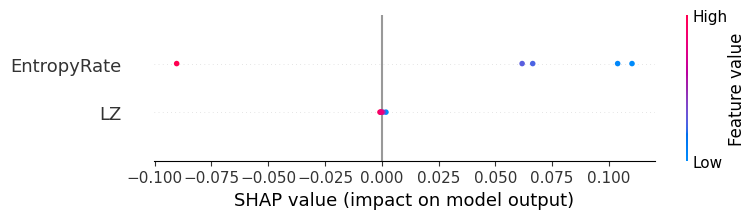

Drug: LSD, Participant: 1
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



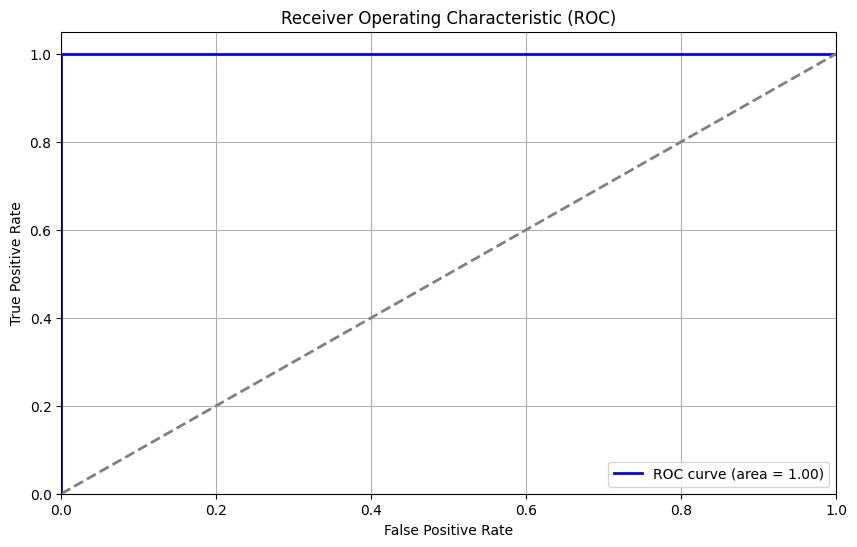

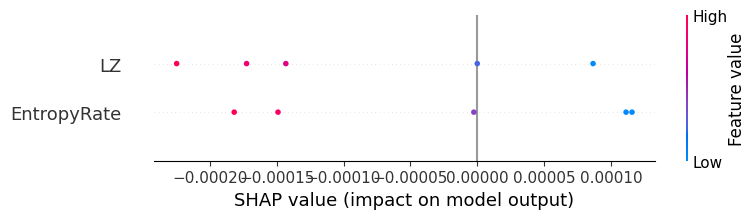

Drug: LSD, Participant: 2
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



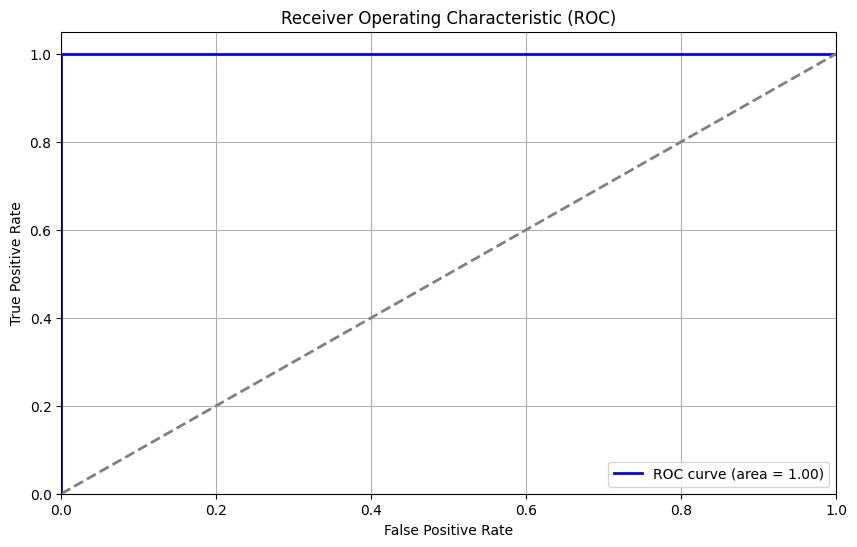

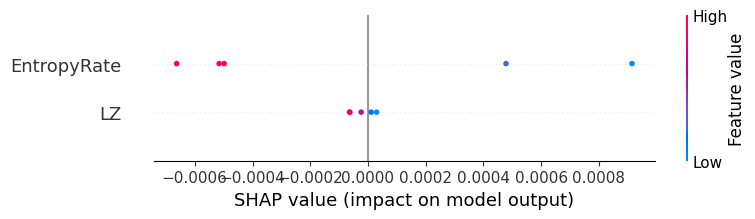

Drug: LSD, Participant: 3
Best Parameters: {'clf__C': 10, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.67      0.80         3
         PLA       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



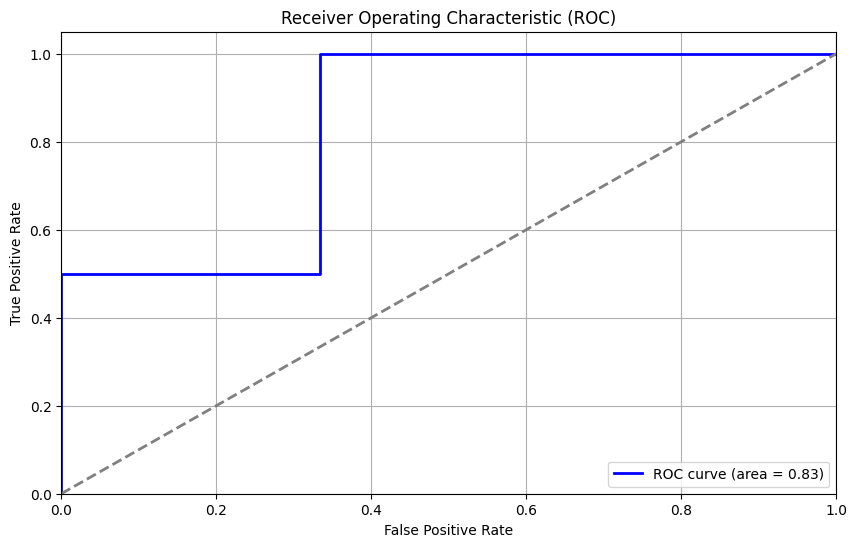

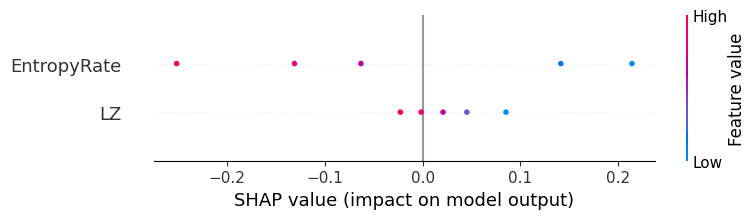

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Drug: LSD, Participant: 4
Best Parameters: {'clf__C': 10, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



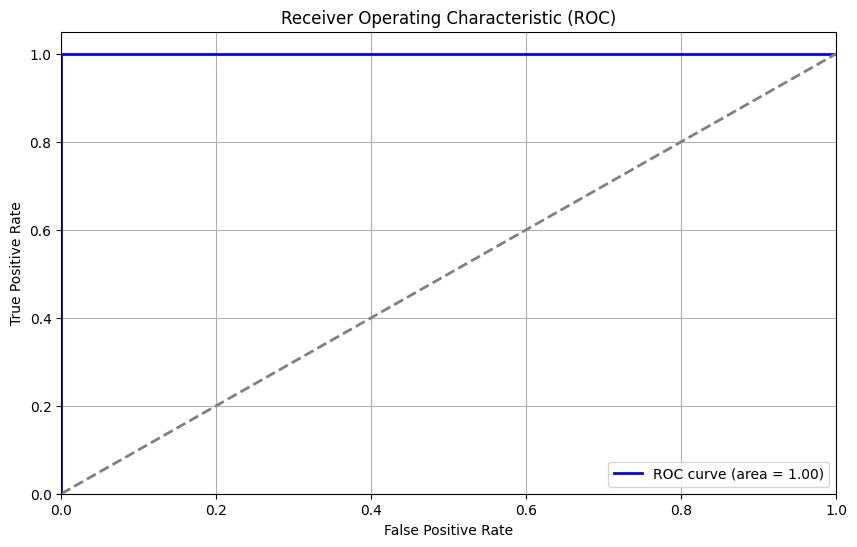

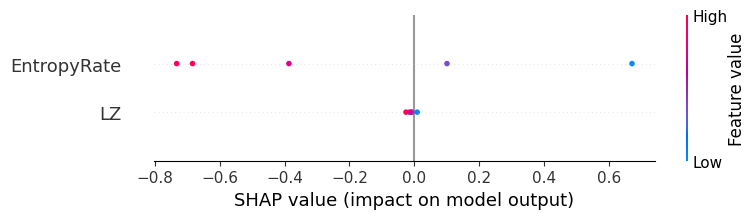

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Drug: LSD, Participant: 5
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.00      0.00      0.00         3
         PLA       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



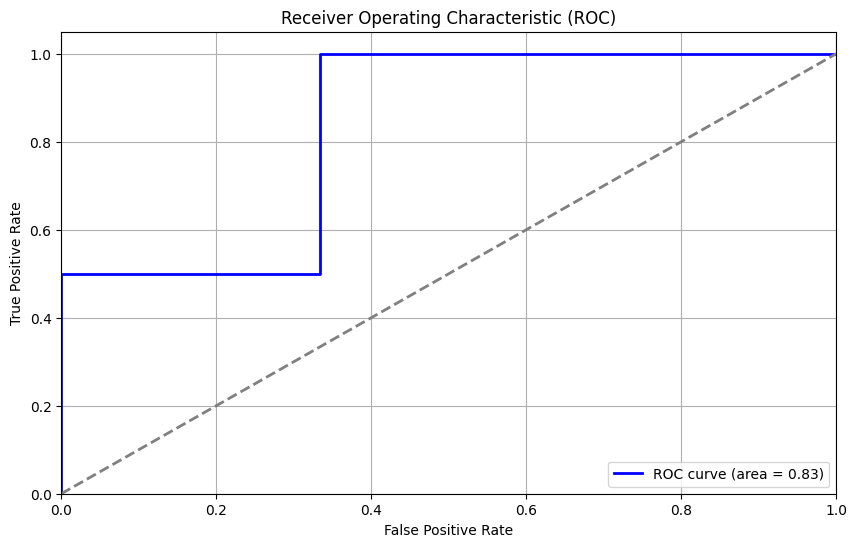

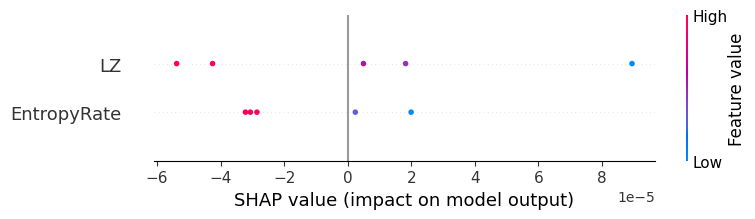

Drug: LSD, Participant: 6
Best Parameters: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



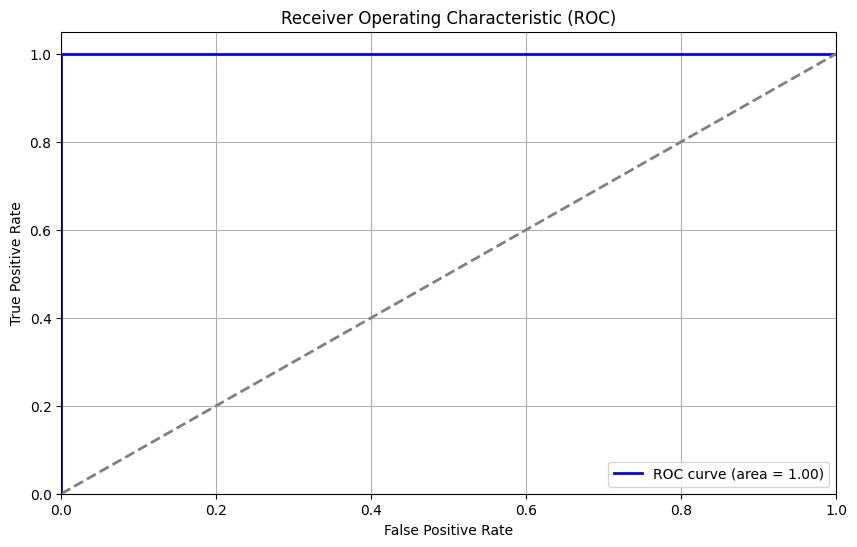

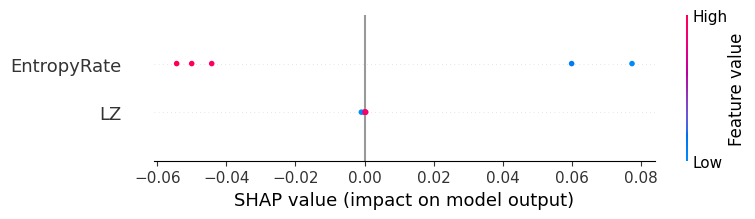

Drug: LSD, Participant: 7
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



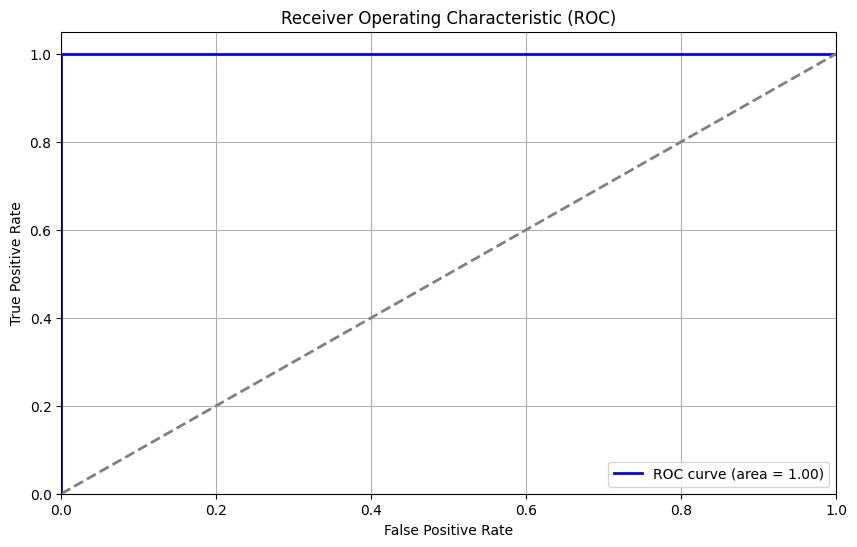

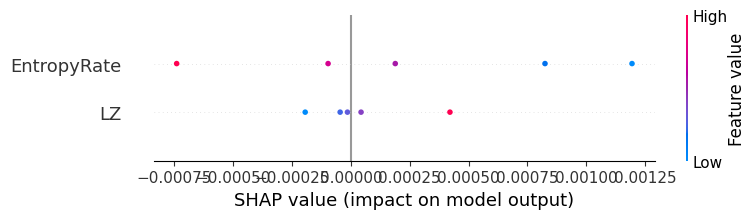

Drug: LSD, Participant: 8
Best Parameters: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



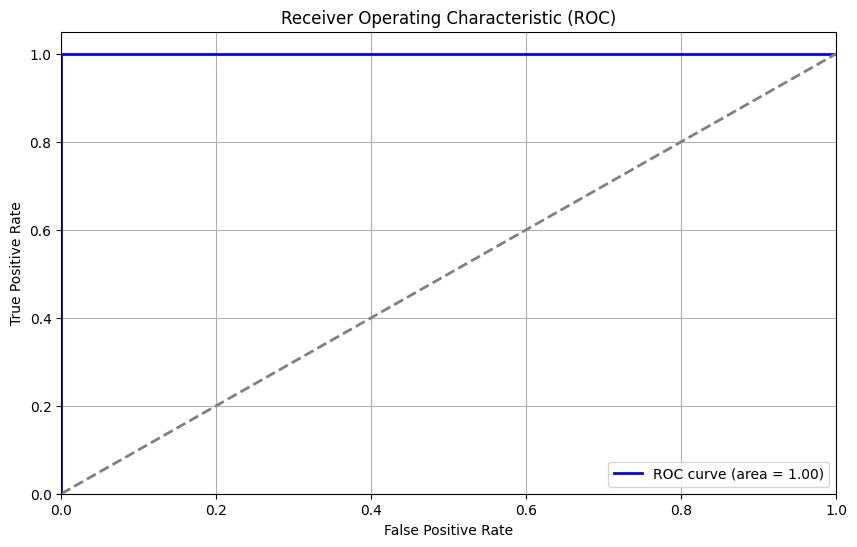

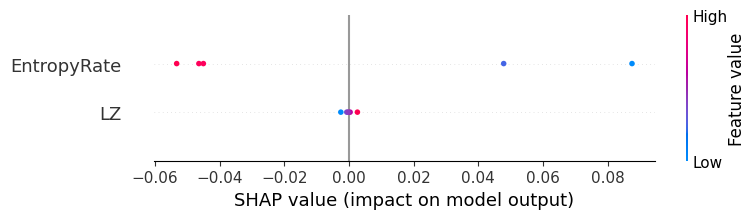

Drug: LSD, Participant: 9
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.67      0.80         3
         PLA       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



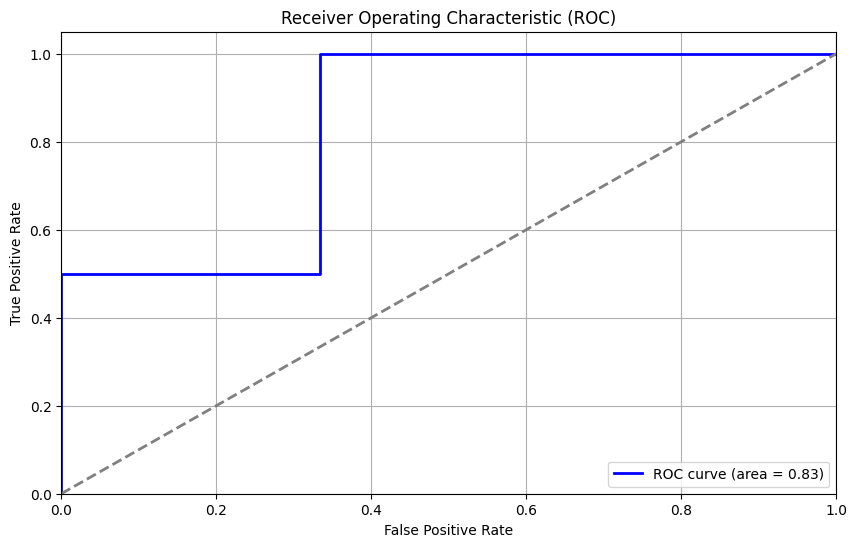

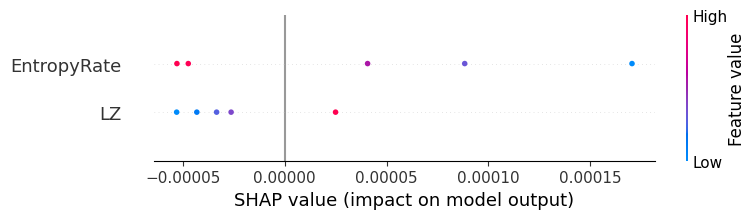

Drug: LSD, Participant: 10
Best Parameters: {'clf__C': 10, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.67      0.67      0.67         3
         PLA       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



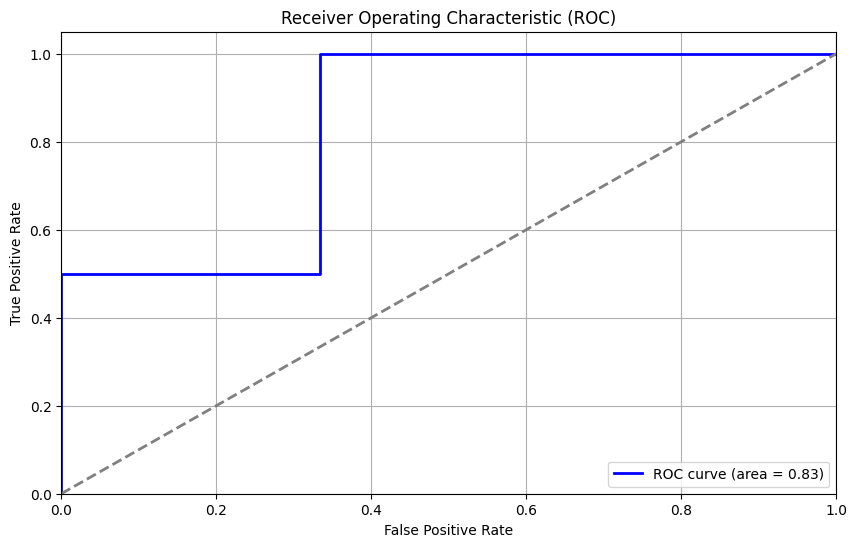

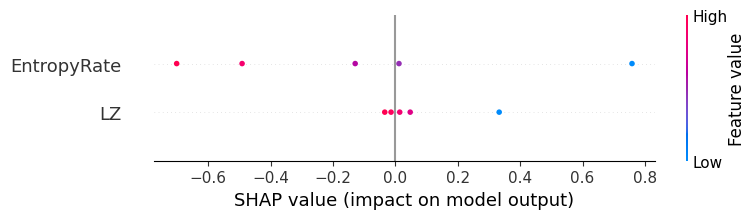

Drug: LSD, Participant: 11
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.67      0.80         3
         PLA       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



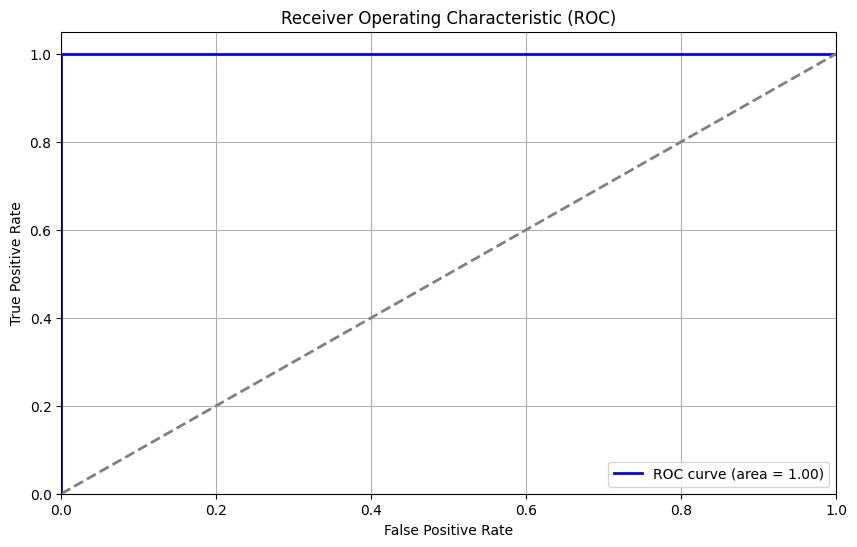

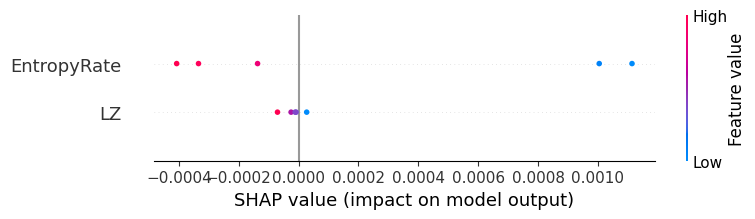

Drug: LSD, Participant: 12
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.00      0.00      0.00         3
         PLA       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


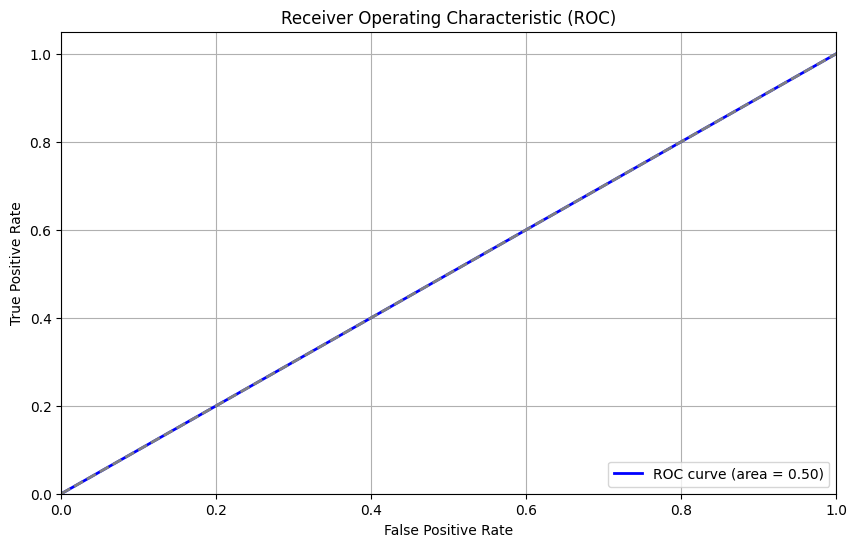

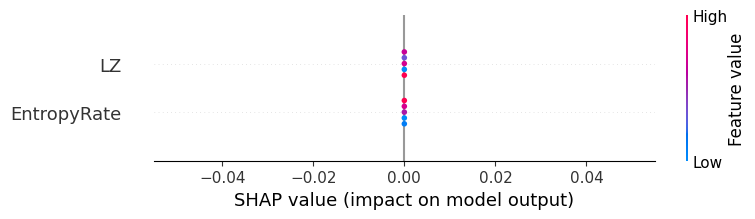

Drug: LSD, Participant: 13
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



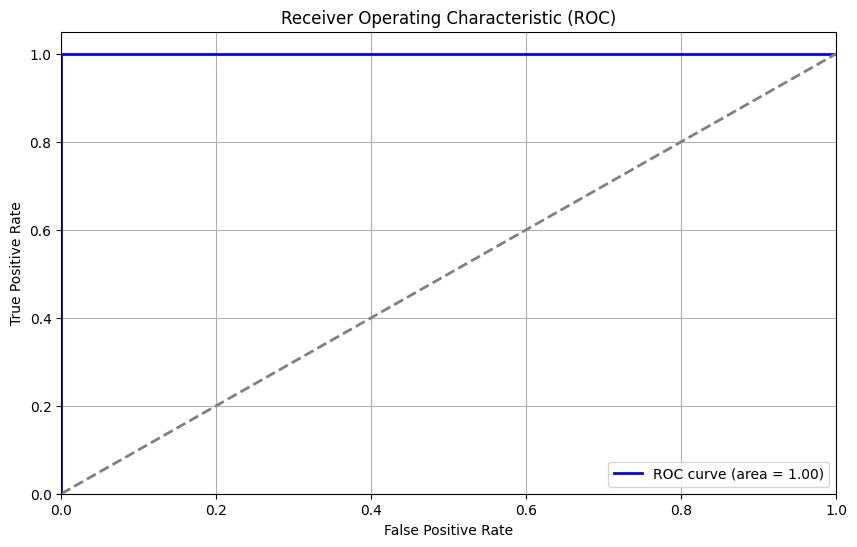

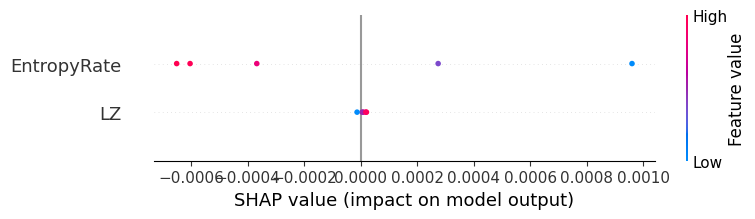

Drug: LSD, Participant: 14
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.75      1.00      0.86         3
         PLA       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



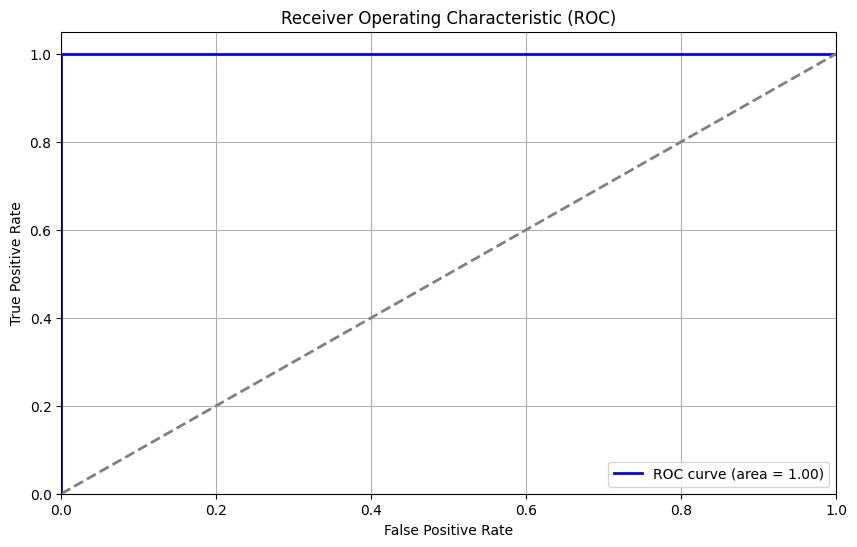

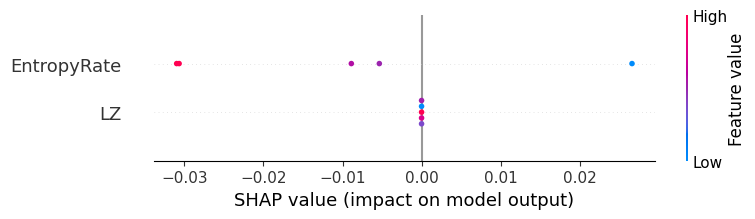

Drug: LSD, Participant: 15
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.67      0.80         3
         PLA       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



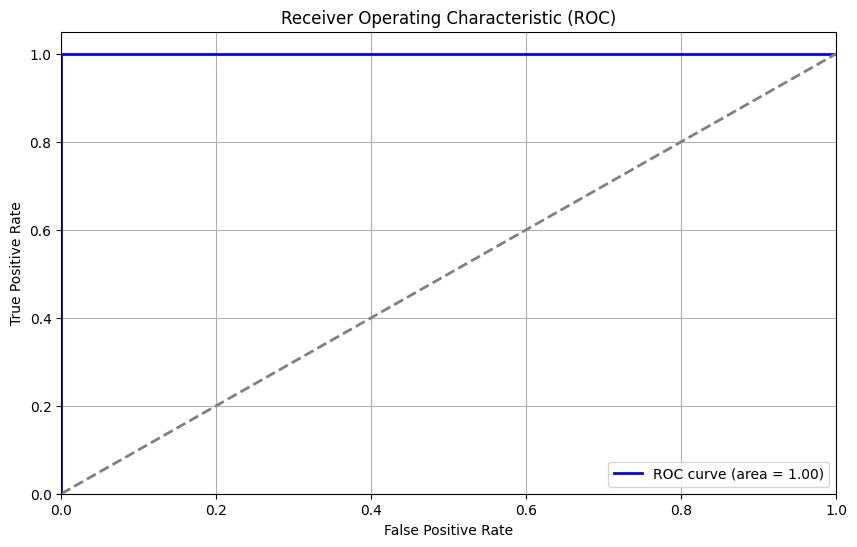

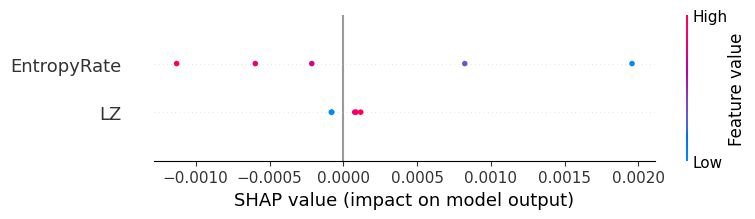

Drug: PSI, Participant: 1
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



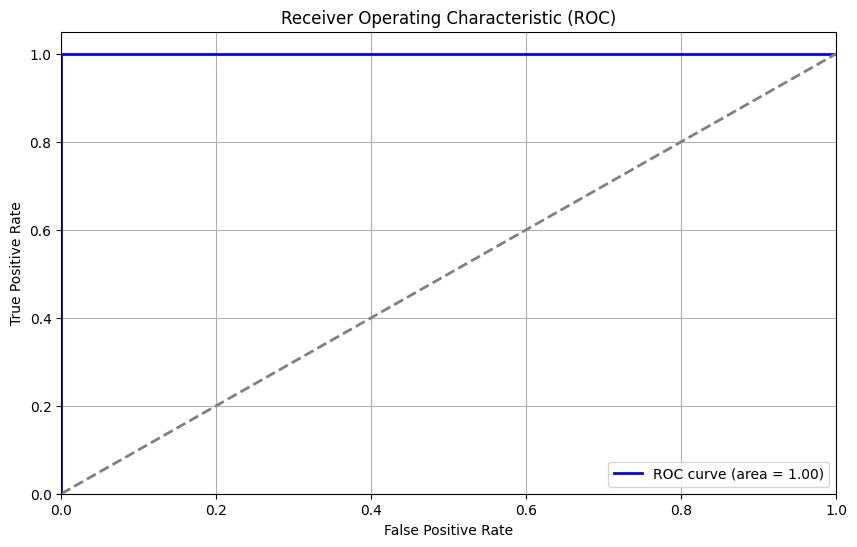

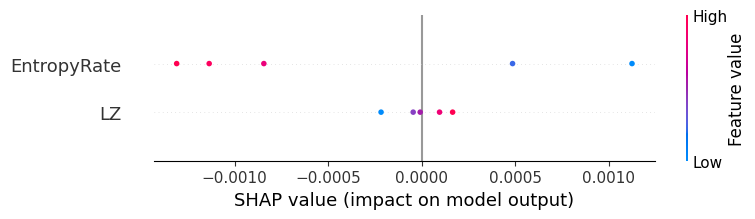

Drug: PSI, Participant: 2
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



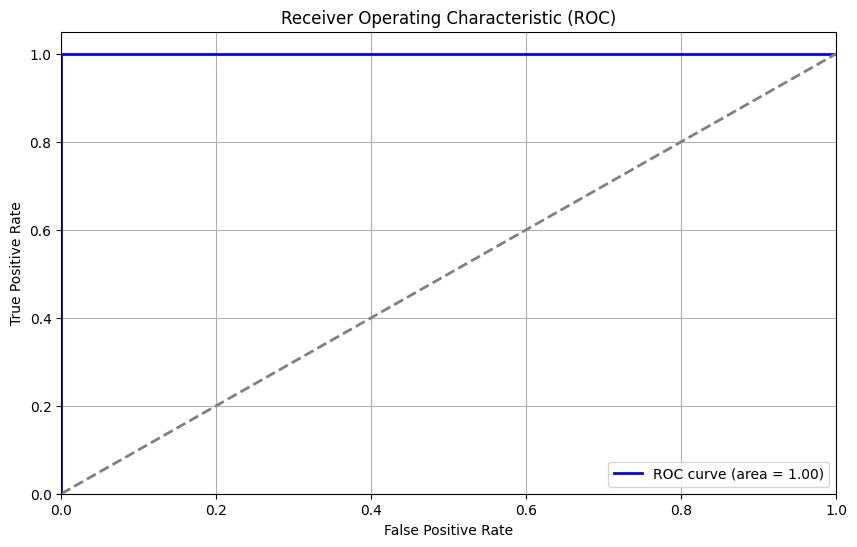

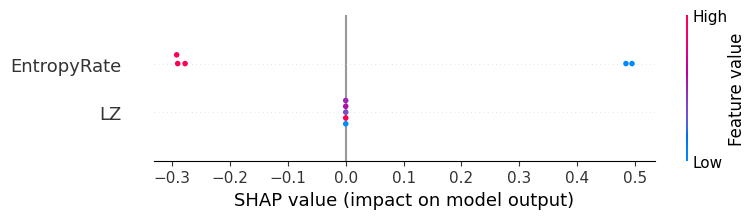

Drug: PSI, Participant: 3
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      1.00      1.00         3
         PLA       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



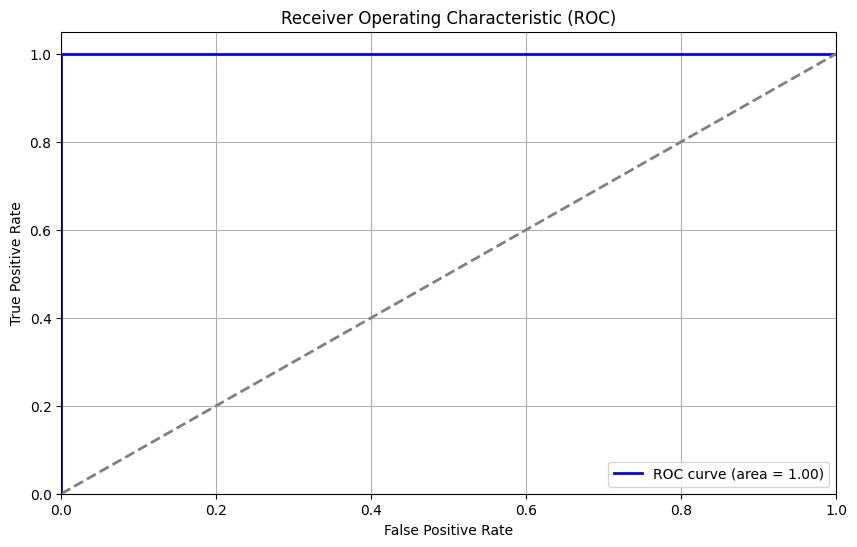

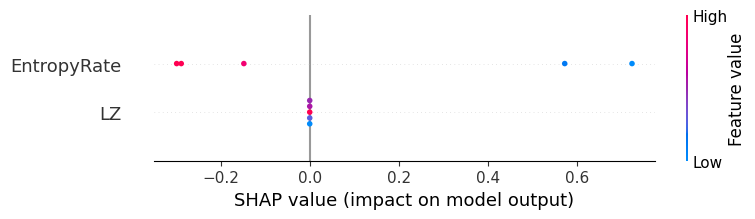

Drug: PSI, Participant: 4
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.67      0.67      0.67         3
         PLA       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



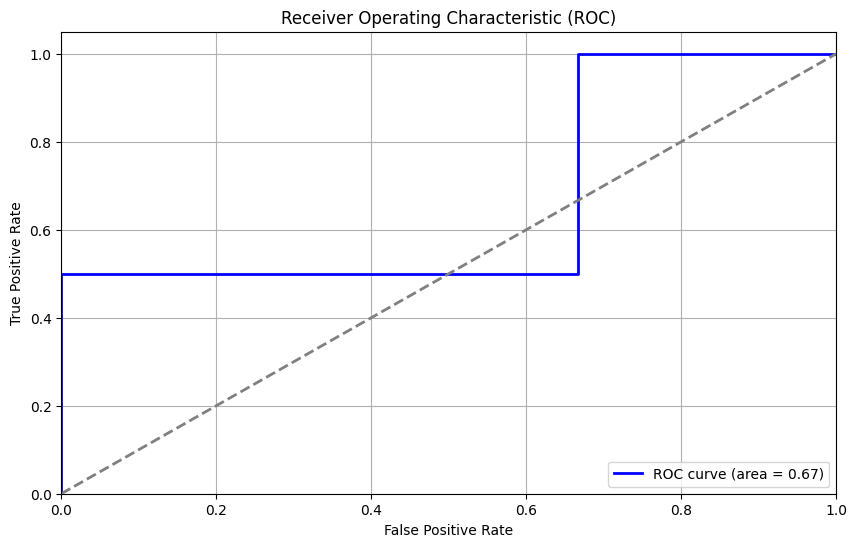

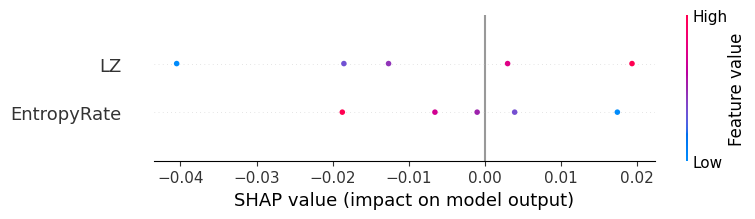

Drug: PSI, Participant: 5
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.33      0.50         3
         PLA       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



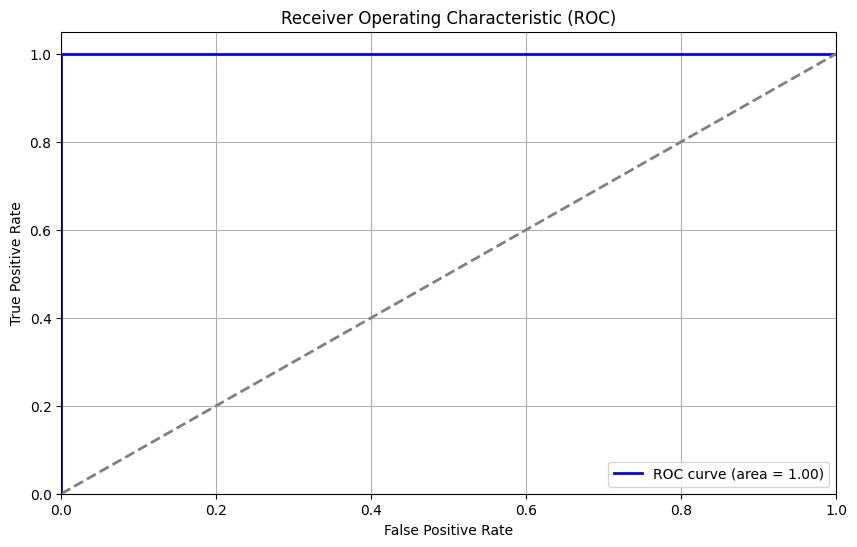

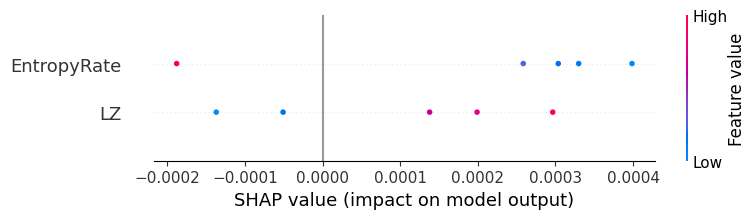

Drug: PSI, Participant: 6
Best Parameters: {'clf__C': 100, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.67      0.80         3
         PLA       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



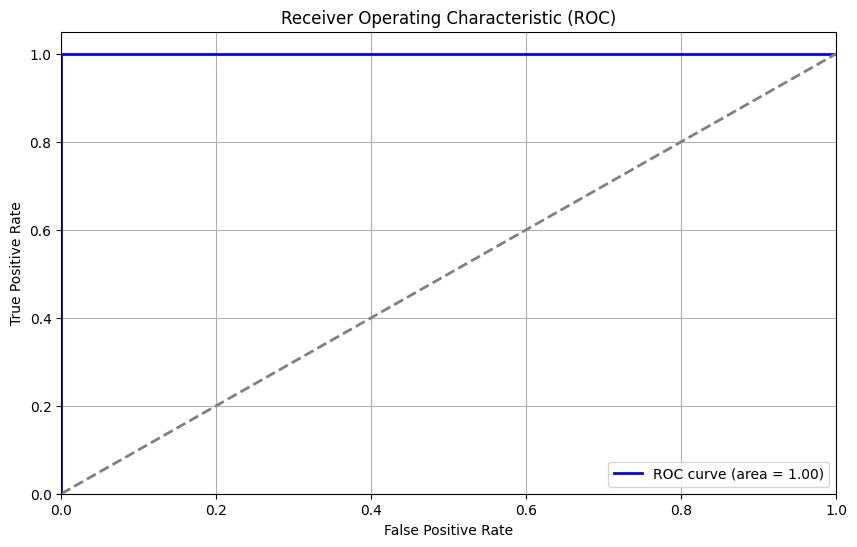

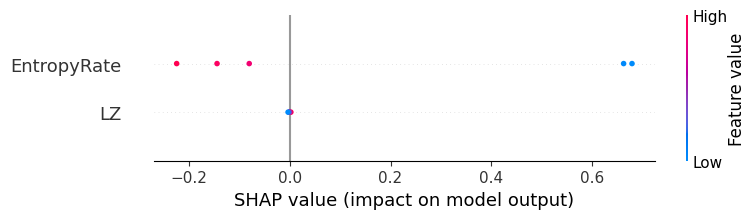

Drug: PSI, Participant: 7
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.33      0.33      0.33         3
         PLA       0.00      0.00      0.00         2

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5



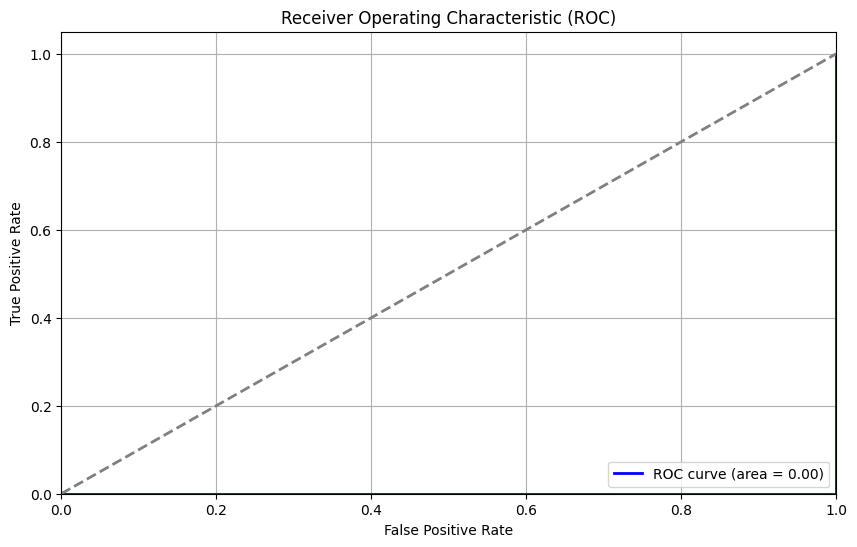

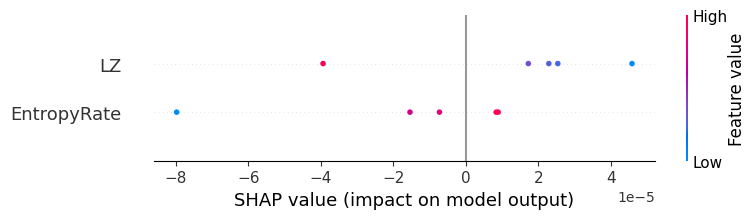

Drug: PSI, Participant: 8
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.60      1.00      0.75         3
         PLA       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


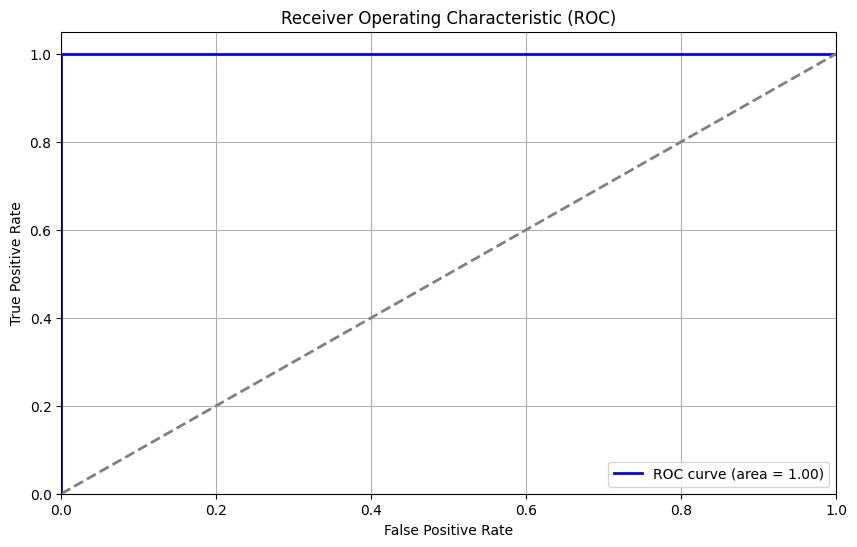

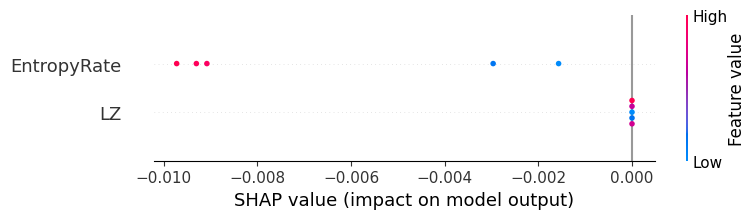

Drug: PSI, Participant: 9
Best Parameters: {'clf__C': 10, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.75      1.00      0.86         3
         PLA       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



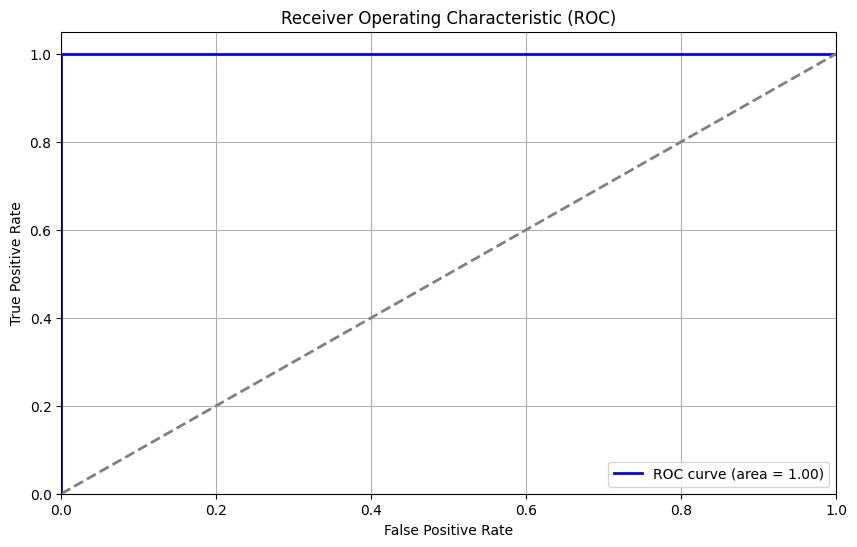

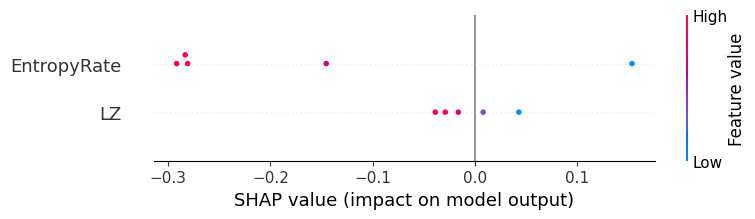

Drug: PSI, Participant: 10
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.67      0.67      0.67         3
         PLA       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



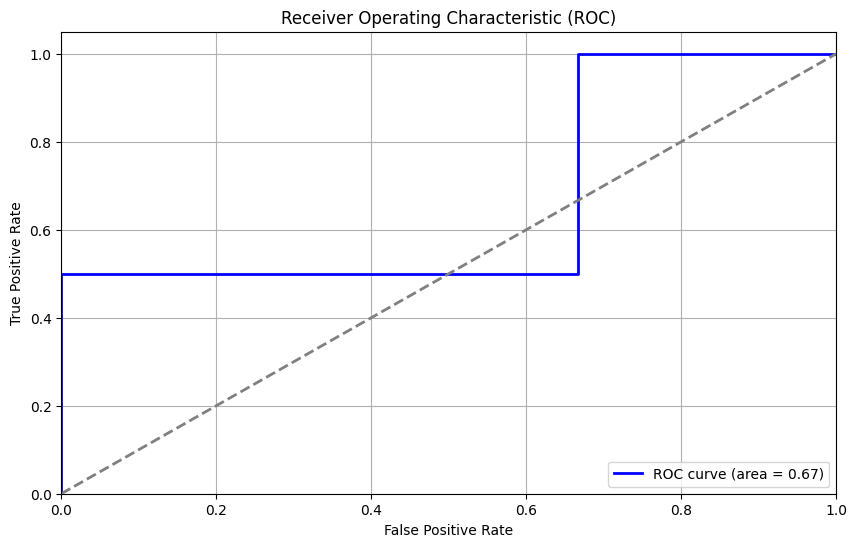

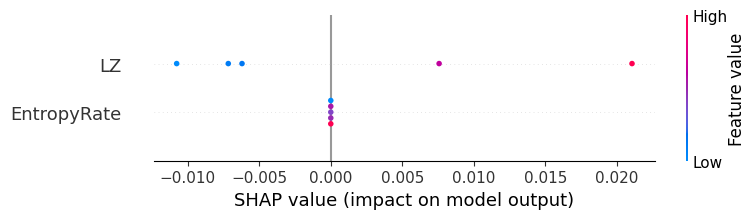

Drug: PSI, Participant: 11
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.00      0.00      0.00         3
         PLA       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


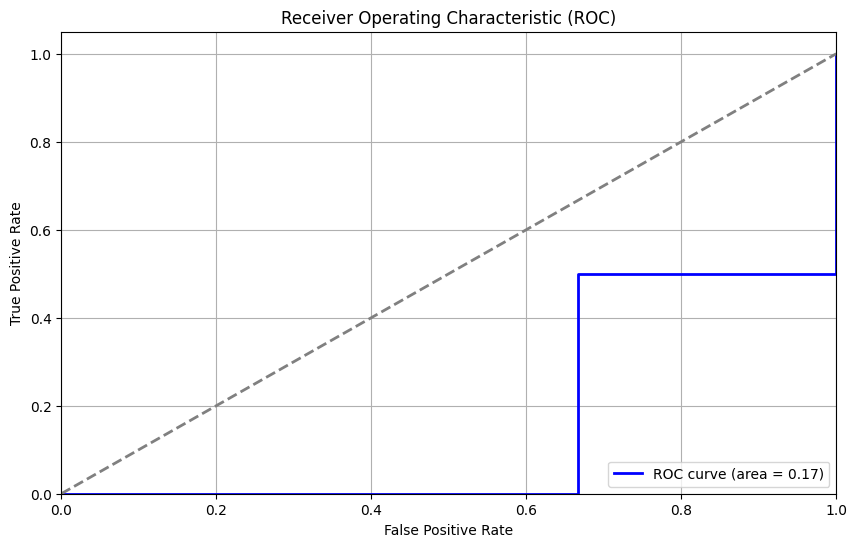

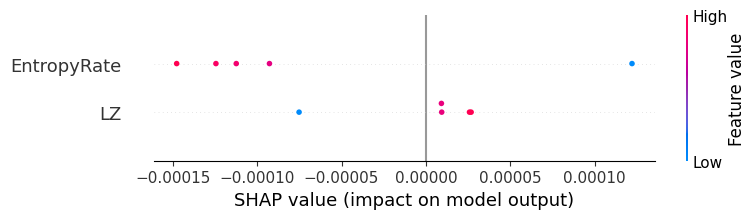

Drug: PSI, Participant: 12
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.33      0.33      0.33         3
         PLA       0.00      0.00      0.00         2

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5



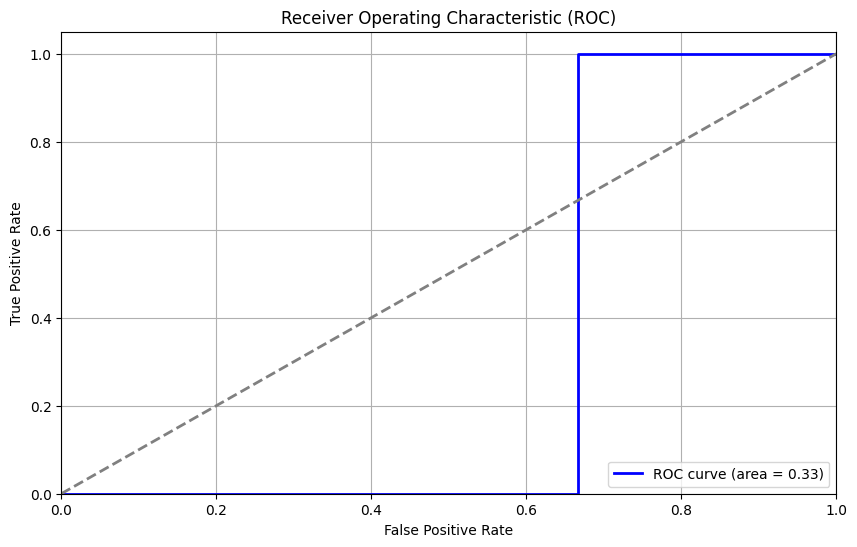

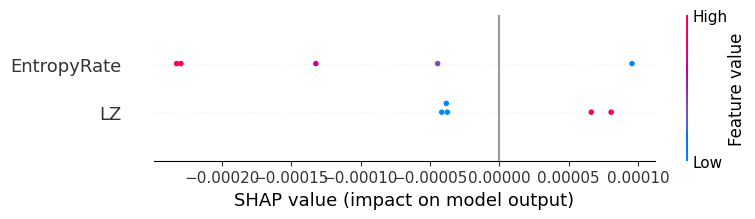

Drug: PSI, Participant: 13
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       1.00      0.67      0.80         3
         PLA       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



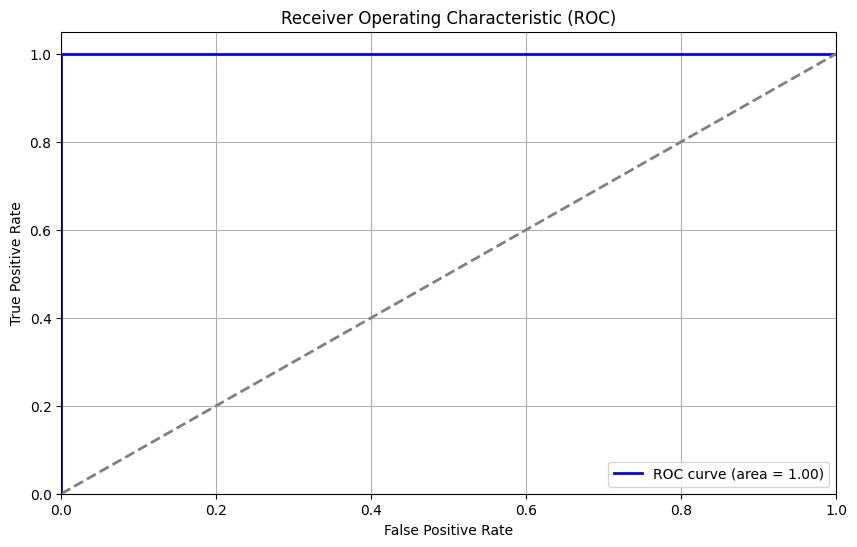

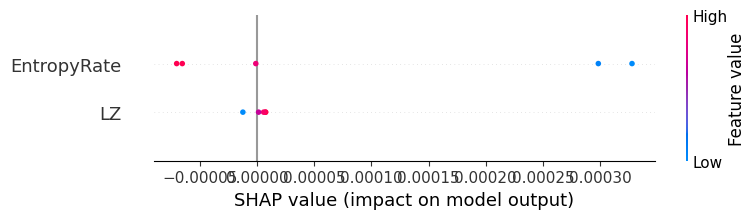

Drug: PSI, Participant: 14
Best Parameters: {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         DRU       0.60      1.00      0.75         3
         PLA       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


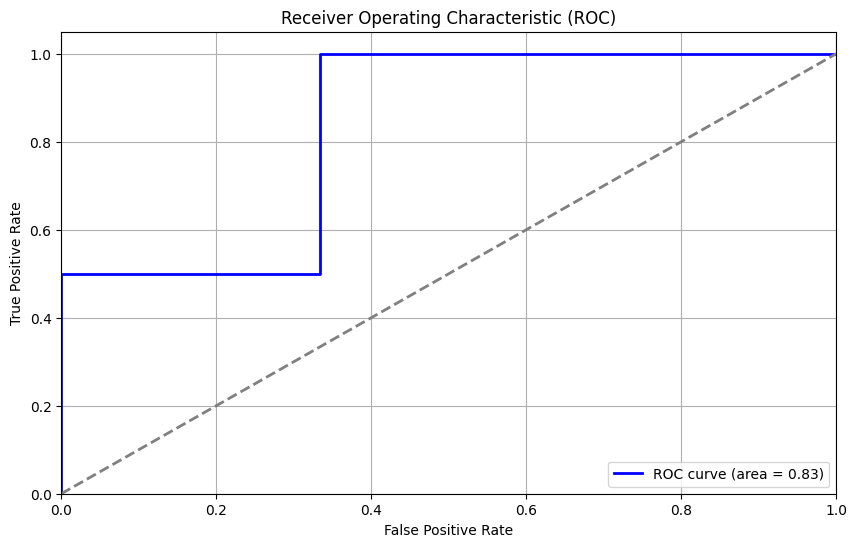

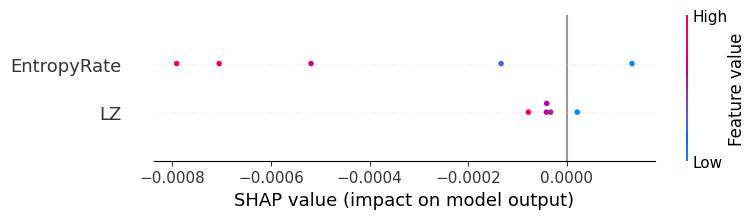

In [25]:

# Define the preprocessing and model pipeline
def create_logistic_regression_pipeline():
    """Create a pipeline for Logistic Regression."""
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature scaling
        ('clf', LogisticRegression())  # Logistic Regression classifier
    ])

    # Define hyperparameters for Grid Search
    param_grid = {
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'clf__solver': ['liblinear', 'saga'],  # 'liblinear' for smaller datasets and 'saga' for larger ones
        'clf__penalty': ['l1', 'l2']
    }

    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    return grid_search

def preprocess_data(data):
    """Preprocess the data by normalizing and scaling."""
    features = ['EntropyRate', 'LZ']
    X = data[features]
    y = data['Condition']

    # Encode the target variable
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    return X, y_encoded, le

def evaluate_model(best_model, X_test, y_test, le):
    """Evaluate the model using classification report and ROC curve."""
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

def analyze_shap(best_model, X_train, X_test):
    """Analyze SHAP values for feature importance."""
    # Extract the Logistic Regression model from the pipeline
    model = best_model.named_steps['clf']

    # Initialize SHAP explainer with the model
    explainer = shap.LinearExplainer(model, X_train)

    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test)

    # Summary Plot
    shap.summary_plot(shap_values, X_test, feature_names=['EntropyRate', 'LZ'])

# Assuming merged_data is your DataFrame
drug_groups = merged_data['Drug'].unique()

# Split the data by drug group
drug_data = {drug: merged_data[merged_data['Drug'] == drug] for drug in drug_groups}

# Iterate over each drug group
for drug, data in drug_data.items():
    participants = data['Subject'].unique()

    for participant in participants:
        # Filter data for this participant
        participant_data = data[data['Subject'] == participant]

        # Preprocess data
        X, y, le = preprocess_data(participant_data)

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

        # Create and train model
        grid_search = create_logistic_regression_pipeline()
        grid_search.fit(X_train, y_train)

        # Print the best parameters
        print(f"Drug: {drug}, Participant: {participant}")
        print(f"Best Parameters: {grid_search.best_params_}")

        # Train and evaluate the best model
        best_model = grid_search.best_estimator_
        evaluate_model(best_model, X_test, y_test, le)

        # Analyze SHAP values
        analyze_shap(best_model, X_train, X_test)
